<a href="https://colab.research.google.com/github/MarcosRMG/Bootecamp-Alura-Data-Science/blob/main/Marcos_R_M_Galv%C3%A3o_Projeto_m%C3%B3dulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


<font size=15>**Pesquisa Nacional de Saúde do Escolar - PeNSE 2015: *Saúde sexual e reprodutiva***</font>


---



Autor: Marcos Galvão

[Linkedin](https://br.linkedin.com/in/marcosrmgalvao)

[Github](https://github.com/MarcosRMG)

[Blog Jogando com Dados](https://jogandocomdados.blogspot.com/)


---

#<font size=5>**Orientações de uso do notebook**</font>

1.   Antes de executar qualquer trecho de código execute todas as celulas por meio da função Runtime > Run all do Google Colaboratory.
2.   A variável dicionario_variaveis_amostra_2 e dicionario_variaveis_amostra_1 podem ser utilizadas para consulta das perguntas e do respectivo código da pergunta utilizado pelo IBGE.
3. A variável dados_amostra_2 e dados_amostra_1 contém o resultado da pesquisa PeNSE 2015 referente a segunda e primeira amostra.
4. Qualquer alteração nos tópicos de tratamento dos dados (2.1) irá afetar as análises (2.2).



---



#<font size=5>**Glossário de variáveis**</font>

dados_amostra_1: [Data Frame pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame) com o resultado da Pesquisa Nacional de Saúde do Escolar - PeNSE 2015 referente a amostra 1, questões aplicadas aos estudantes do 9º ano e referente à escola.

dados_amostra_2: Data Frame pandas com o resultado da Pesquisa Nacional de Saúde do Escolar - PeNSE 2015 referente a amostra 2, questões aplicadas aos escolares de 13 a 17 anos de idade frequentando as etapas do 6º ao 9º ano do ensino fundamental (antigas 5ª a 8ª séries) e da 1ª a 3ª série do ensino médio e referente à escola.

dicionario_variaveis_amostra_1: [Dicionário Python](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) contendo uma [lista Python](https://docs.python.org/3/tutorial/introduction.html#lists) onde o index 0 contém o código da pergunta da Pesquisa Nacional de Saúde do Escolar - PeNSE 2015, e o índex 1 um dicionário com as opções de respostas. 

Ex: 

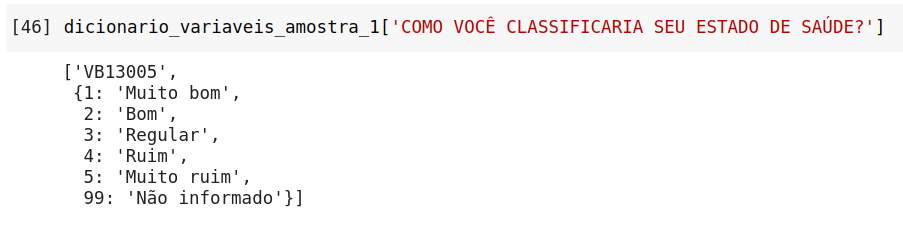

dicionario_variaveis_amostra_2: Dicionário Python contendo uma lista Python onde o index 0 contém o código da pergunta da Pesquisa Nacional de Saúde do Escolar - PeNSE 2015, e o índex 1 um dicionário com as opções de respostas (obs: mesma estrutura da variável dicionario_variaveis_amostra_1). 



---



# **1 Resumo**

O seguinte projeto tem como tema a saúde sexual e reprodutiva dos escolares que participaram da Pesquisa Nacional de Saúde do Escolar - PeNSE 2015, foram explorados os dados da amostra 1 (escolares cursando o 9º ano do ensino fundamental) e amostra 2 (escolares cursando do 6º ano do ensino fundamental ao 3º ano do ensino médio). Para ambas as amostras as perguntas foram divididas em três categorias, sendo elas: relação sexual, prevenção à gravidez e DST's e violência sexual. No tópico 2.1 se concentra o tratamentos dos dados e funções para visualização dos resultados, no tópico 2.2 foram feitas as análises das perguntas relacionadas a saúde sexual bem como perguntas de caráter geral. A pesquisa caracteriza se como de caráter exploratório descritivo, mas não partiu de um problema de pesquisa previamente elaborado, algumas informações como idade média relacionada a alguma pergunta não foi explorada pois as idades (bem como as demais variáveis de interesse) foram categorizadas no questionário, outras questões sobre o aumento ou diminuição de alguma variável também não poderam ser exploradas pois não foi feita uma análise temporal das questões aqui expostas. Apesar das limitações aqui apresentadas os resultados demostram a necessidade de se alcançar uma maior parcela de escolares que foram orientados sobre prevenção à gravidez e DST's e meios para a denúncia por parte do escolar sobre o abuso sexual, visto que a maior parcela dos responsáveis pelo abuso são pessoas conhecidas/ próximas do escolar. 

# **2 Tratamento e Análise dos Dados**

## *2.1 Tratamento dos Dados*

### 2.1.1 Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import ranksums

### 2.1.2 Funções

#### 2.1.2.1 Dicionário de Variáveis

In [2]:
def adaptacao_df_dicionario(df_dicionario_variaveis: pd.DataFrame, coluna_1: str,
                            coluna_2: str):
  '''
  Altera o nome das colunas e o tipo de dados para string

  Keywords arguments:
  df_dicionario_variaveis: Data Frame com o dicionário das variáveis.
  coluna_1: Nome da primeira coluna.
  coluna_2: Nome da segunda coluna.

  return: Data Frame com o nome das colunas e tipos de dados alterados.
  '''

  df_dicionario_variaveis.columns = [coluna_1, coluna_2]
  df_dicionario_variaveis = df_dicionario_variaveis.astype('str')
  return df_dicionario_variaveis

In [3]:
def codigos_descricao_perguntas(dicionario_amostra: pd.DataFrame, 
                                coluna_codigos: str, coluna_descricao: str):
  '''
  A função cria duas listas, uma com os códigos do dicionário de variáveis e
  outra com as descrições do dicionário de variáveis.
  
  Keyword arguments
  dicionario_amostra: Data Frame com os dados do dicionário.
  coluna_codigos: Especificação da coluna do Data Frame que contém os códigos.
  coluna_descrição: Especificação da coluna do Data Frame que contém as
  descrições.

  return: Duas listas com os códigos e descrições do dicionário de variáveis.

  '''
  codigos_perguntas = []
  descricao_perguntas = []
  linha = 0

  for i in dicionario_amostra[coluna_codigos]:
    if i.isupper():
      codigos_perguntas.append(i)
      dicionario_amostra[coluna_descricao][linha] = dicionario_amostra[coluna_descricao][linha].upper()
      descricao_perguntas.append(dicionario_amostra[coluna_descricao][linha])
    linha += 1
  return codigos_perguntas, descricao_perguntas  

In [4]:
def captura_opcoes_resposta(df_dicionario_variaveis: pd.DataFrame, coluna_controle:
                            str, coluna_opcoes_resposta: str):
  '''
  Cria uma lista com as opções de resposta do dicionário de variáveis

  Keywords arguments:
  df_dicionario_variaveis: Data Frame com as informações do dicionário de 
  variáveis.
  coluna_controle: Coluna para checagem dos critérios de captura dos dados, 
  primeira coluna do Data Frame.
  coluna_opcoes_resposta: Coluna para captura das informações, segunda coluna
  do Data Frame.

  return: Lista com as opções de resposta do dicionário de variáveis.
  '''

  opcoes_resposta = []
  linha = 0

  for i in df_dicionario_variaveis[coluna_controle]:
    if i.isdigit() or i == '-1' or i == '0 a 2999':
      opcoes_resposta.append(i)
      opcoes_resposta.append(df_dicionario_variaveis[coluna_opcoes_resposta][linha])
    linha += 1

  return opcoes_resposta

In [5]:
def converte_para_inteiro(opcoes_resposta: list):
  '''
  Converte a lista de opções de resposta para o tipo int

  Keywords arguments:
  opcoes_resposta: Lista com os códigos de opção de resposta do dicionário de
  variáveis.

  return: Lista com os tipos de opções de resposta no tipo int
  '''

  cont = 0

  for i in opcoes_resposta:
    if i.isdigit():
      opcoes_resposta[cont] = int(i)
    cont += 1
  return opcoes_resposta

In [6]:
def cria_dicionario_variaveis(df_dicionario_amostra: pd.DataFrame, 
                              descricao_perguntas: list, codigos_perguntas: list,
                              primeira_coluna: str):

  '''
  Cria um dicionário com as variáveis da pesquisa

  Keywords arguments:
  df_dicionario_amostra['primeira_coluna']: DataFrame com os dados do dicionário
  de variáveis.
  descricao_perguntas: Lista com a descrição das perguntas do dicionário de 
  variáveis.
  codigos_perguntas: Códigos das perguntas do dicionário de variáveis.
  primeira_coluna: Coluna para seleção das informações do Data Frame com as 
  informações do dicionário de variáveis.

  return: Dicionário com todas as informações do dicionário de variáveis da 
  pesquisa.
  '''

  dicionario_variaveis = {}


  item_descricao_pergunta = item_codigo_pergunta = item_opcao_resposta = 0

  for i in df_dicionario_amostra[primeira_coluna][:-3]:
    if i.isupper():
      dicionario_variaveis[descricao_perguntas[item_descricao_pergunta]] = [codigos_perguntas[item_codigo_pergunta]]
      dicionario_variaveis[descricao_perguntas[item_descricao_pergunta]].append(dict())
      item_descricao_pergunta += 1
      item_codigo_pergunta += 1
    else:
      dicionario_variaveis[descricao_perguntas[item_descricao_pergunta - 1]][1].update({
      opcoes_resposta[item_opcao_resposta]: opcoes_resposta[item_opcao_resposta + 1]})
      item_opcao_resposta += 2

  return dicionario_variaveis

#### 2.1.2.2 Calcula proporções

In [7]:
def calcula_proporcao(df_dados_amostra: pd.DataFrame, codigo_pergunta: str):
  '''
  Calcula a proporção do resultado da pergunta
  
  Keywords arguments
  df_dados: Data Frame com o resultado da amostra selecionada.
  codigo_pergunta: Pergunta selecionada para cálculo.

  return: Resultados da pergunta em percentual.
  '''

  return pd.DataFrame(round(df_dados_amostra[codigo_pergunta].value_counts(normalize=True) * 100, 2))

#### 2.1.2.3 Gráfico de Pizza

In [8]:
def grafico_pizza(dados_resultado: pd.DataFrame, codigo_pergunta: str, titulo: str):
  '''
  Imprime o resultado da pergunta no gráfico de pizza.

  dados_resultado: Data Frame com os resultados da pergunta.
  codigo_pergunta: Código da pergunta para visualização do resultado.
  titulo: Título do gráfico.
  '''

  _ = px.pie(dados_resultado, names=dados_resultado.index, values=codigo_pergunta,
       title=titulo)
  _.update_layout(font=dict(size=14))
  _.show()

#### 2.1.2.4 Altera opções de resposta

In [9]:
def altera_opcoes_resposta(df_dados_amostra: pd.DataFrame, 
                           dicionario_variaveis_amostra: dict, 
                           codigo_pergunta: str,
                           descricao_pergunta: str):
  '''
  Altera a descrição das opções de resposta na pergunta

  Keywords
  df_dados_amostra: Data Frame com o resultado da amostra.
  dicionario_variaveiss_amostra: Dicionário de variáveis da amostra.
  codigo_pergunta: Código da pergunta constante no dicionário de variáveis da 
  amstra.
  descricao_pergunta: descrição da pergunta constante no dicionário de variáveis
  da amstra.

  return: Coluna do resultado da amostra com a opçõesde resposta alterado 
  seguindo o dicionário de variáveis da amostra.
  '''

  return df_dados_amostra[codigo_pergunta].map(dicionario_variaveis_amostra[descricao_pergunta][1])

#### 2.1.2.5 Gráfico de barras

In [10]:
def grafico_barras(dados_resultado: pd.DataFrame, codigo_pergunta: str, 
                   titulo: str, x_label: str, y_label: str):

  '''
  Imprime o gráfico de barras

  Keywords arguments
  dados_resultado: Data Frame do resultado calculado em percentual.
  codigo_pergutna: Código da pergunta com o resultado calculado.
  titulo: Título do gráfico.
  x_label: Descrição do eixo x.
  y_label: Descrição do eixo y.
  '''

  _ = px.bar(dados_resultado, x=dados_resultado.index, y=codigo_pergunta,
       title=titulo)
  _.update_layout(xaxis_title=x_label, yaxis_title=y_label, font=dict(size=14))
  _.show()

#### 2.1.2.6 Tabela de frequência

In [11]:
def tabela_frequencia(df_dados_amostra: pd.DataFrame, codigo_pergunta: str,
                      titulo_indice: str):
  '''
  Cria um DataFrame com uma coluna de frequência e outra com a respectiva 
  proporção

  Keywords arguments
  df_dados_amostra: DataFrame com os dados da amostra da pequisa estudada.
  codigo_pergunta: Código da pergunta para criar a tabela de frequência.
  titulo_indice: Título para identificar o índice.

  return: Tabela de frequêcia calculada.
  '''

  frequencia = df_dados_amostra[codigo_pergunta].value_counts()
  proporcao = round(df_dados_amostra[codigo_pergunta].value_counts(normalize=True) * 100, 1)

  df_tabela = pd.DataFrame({'Frequência': frequencia, 'Proporção %': proporcao})
  df_tabela.reset_index(inplace=True)
  df_tabela.rename(columns={'index': titulo_indice}, inplace=True)
  df_tabela.set_index(titulo_indice, inplace=True)

  return df_tabela


#### 2.1.2.7 Tabela cruzada percentual

In [12]:
def tabela_cruzada_proporcao(df_dados_amostra: pd.DataFrame, codigo_indice: str,
                             codigo_coluna: str, orientacao_proporcao: str, 
                             titulo_indice: str, titulo_coluna: str): 
    
    '''
    Retorna o cruzamento de duas variáveis calculando a proporção pelo índice ou
    pelas colunas.

    Keywords arguments
    df_dados_amostra: DataFrame com os dados da amostra.
    codigo_indice: Código da pergunta para ser calculada no índice.
    codigo_coluna: Código da pergunta para ser calculada na coluna.
    orientacao_proporcao: Calcula a proprcao pelo índice (index), pela coluna 
    (columns) ou pela tabela total (all).
    titulo_indice: Título para descriminação da variável posicionada no índice.
    titulo_coluna: Título para descriminação da variável posicionada na coluna.

    return: Tabela de proporção cruzada.
    '''

    return round(pd.crosstab(
        index=df_dados_amostra[codigo_indice],
        columns=df_dados_amostra[codigo_coluna],
        normalize=orientacao_proporcao,
        rownames=[titulo_indice],
        colnames=[titulo_coluna]) * 100, 1)

#### 2.1.2.8 Tabela cruzada calcula valor

In [13]:
def tabela_cruzada_valor(df_dados_amostra: pd.DataFrame, codigo_indice: str,
                             codigo_coluna: str, codigo_valor: str, funcao: str,
                             titulo_indice: str, titulo_coluna: str):
    '''
    Retorna o cruzamento de duas variáveis calculando o valor desejado.

    Keywords arguments
    df_dados_amostra: DataFrame com os dados da amostra.
    codigo_indice: Código da pergunta para ser calculada no índice.
    codigo_coluna: Código da pergunta para ser calculada na coluna.
    codigo_valor: Valor para cálculo da média.
    funcao: Função a ser aplicada no valor especificado.
    titulo_indice: Título para descriminação da variável posicionada no índice.
    titulo_coluna: Título para descriminação da variável posicionada na coluna.

    return: Tabela de proporção cruzada.
    '''

    return round(pd.crosstab(
      index=df_dados_amostra[codigo_indice],
      columns=df_dados_amostra[codigo_coluna],
      values=df_dados_amostra[codigo_valor],
      aggfunc=funcao,
      colnames=[titulo_coluna],
      rownames=[titulo_indice]))

### 2.1.3 Dados

Pesquisa Nacional de Saúde do Escolar - PeNSE 2015

A pesquisa fornece informações sobre as características básicas da população de estudo, incluindo aspectos socioeconômicos, como escolaridade dos pais, inserção no mercado de trabalho e posse de bens e serviços; contextos social e familiar; fatores de risco comportamentais relacionados a hábitos alimentares, sedentarismo, tabagismo, consumo de álcool e outras drogas; saúde sexual e reprodutiva; exposição a acidentes e violências; hábitos de higiene; saúde bucal; saúde mental; e percepção da imagem corporal, entre outros tópicos. Características do ambiente escolar e do entorno são também contempladas, incluindo informações relacionadas à infraestrutura disponível para alimentação e atividade física; acessibilidade; saneamento básico; existência de regras e normas de conduta adotadas pelas escolas; políticas de assistência à saúde; e nível de segurança do entorno, entre outros aspectos (IBGE).

#### 2.1.3.1 Amostra 2 (2015)

"Investiga informações que permitem conhecer e dimensionar os fatores de risco e proteção à saúde dos adolescentes. A pesquisa é realizada por amostragem, utilizando como referência para seleção o cadastro das escolas públicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - INEP (IBGE)".

Amostra 2:
"escolares de 13 a 17 anos de idade frequentando as etapas do 6o ao 9o ano do ensino fundamental (antigas 5a a 8a séries) e da 1a a 3a série do ensino médio (IBGE)".

In [14]:
fonte_amostra_2 = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/PENSE_AMOSTRA2_ALUNOESCOLA.CSV'

dados_amostra_2 = pd.read_csv(fonte_amostra_2, sep=';')

In [15]:
#Primeiras linhas
dados_amostra_2.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,5,1,296


In [16]:
#Últimas linhas
dados_amostra_2.tail()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
16551,2015,76,5,1,2,4,12,8,8,1,1,7,5,2,-1,1,1,1,1,1,1,3,1,3,1,2,2,6,3,8,7,5,8,7,5,1,2,1,-1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,16552,371,117
16552,2015,76,5,1,1,1,15,7,5,1,1,7,4,2,-1,2,1,1,1,1,1,3,1,3,1,1,2,5,4,6,2,4,1,6,1,1,6,4,-1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,16553,371,117
16553,2015,76,5,1,1,4,13,11,7,1,1,7,4,2,-1,1,2,1,1,1,2,3,1,3,1,2,2,5,4,8,1,8,2,8,1,1,5,5,-1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,16554,371,117
16554,2015,76,5,1,1,4,14,8,6,1,1,7,4,2,-1,1,1,1,1,1,1,3,2,3,1,1,2,5,3,7,5,6,4,8,7,3,1,5,-1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,16555,371,117
16555,2015,76,5,1,1,2,15,4,6,1,1,7,5,2,-1,1,1,1,1,1,1,3,2,3,1,2,2,4,4,8,2,6,8,8,5,1,6,1,-1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,16556,371,117


##### 2.1.3.1.1 Dicionáiro da Amostra 2

In [17]:
fonte_dicionario_amostra_2 = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/Dicionario_PENSE_Microdados_AMOSTRA2.csv'

df_dicionario_amostra_2 = pd.read_csv(fonte_dicionario_amostra_2)

In [18]:
#Primeiras linhas
df_dicionario_amostra_2.head()

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte


In [19]:
#Últimas linhas
df_dicionario_amostra_2.tail()

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
1213,3,Confessional
1214,4,Filantrópica
1215,aluno,contador de aluno
1216,escola,UPA (unidade primária de amostragem)
1217,turma,USA (unidade secundária de amostragem)


##### 2.1.3.1.2 Dicionário Python do dicionário da amostra 2

Modelo do dicionário Python para o dicionário da amostra 2

dicionario = { pergunta: [codigo da pergunta, {código da resposta: opção de resposta}]}

In [20]:
#Adaptação do Data Frame
df_dicionario_amostra_2 = adaptacao_df_dicionario(df_dicionario_amostra_2, 'variavel',
                                               'questionario_aluno')

In [21]:
df_dicionario_amostra_2.head()

,variavel,questionario_aluno
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte


In [22]:
#Capturando códigos e descrição das perguntas do Data Frame com as informações do dicionário de variáveis
codigos_perguntas, descricao_perguntas = codigos_descricao_perguntas(df_dicionario_amostra_2, 'variavel', 
                            'questionario_aluno')

In [23]:
#Cinco primeiros
codigos_perguntas[:5]

['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001']

In [24]:
#Cinco últimos
codigos_perguntas[-5:]

['PESO', 'V0006', 'V0007', 'V0008', 'V0041']

In [25]:
#Cinco primeiros
descricao_perguntas[:5]

['ANO EM QUE A PESQUISA FOI REALIZADA',
 'PAÍS',
 'REGIÃO GEOGRÁFICA',
 'PREZADO(A) ESTUDANTE, VOCÊ CONCORDA EM PARTICIPAR DESSA PESQUISA?',
 'QUAL É O SEU SEXO?']

In [26]:
#Cinco últimos
descricao_perguntas[-5:]

['PESO DO ALUNO DE ACORDO COM A AMOSTRA, UTILIZADO PARA EXPANSÃO',
 'SITUAÇÃO DA ESCOLA',
 'DEPENDÊNCIA ADMINISTRATIVA DA ESCOLA',
 'ESFERA ADMINISTRATIVA DA ESCOLA',
 'TIPO DE ESCOLA PRIVADA']

In [27]:
#Capturando as opções de resposta do Data Frame
opcoes_resposta = captura_opcoes_resposta(df_dicionario_amostra_2, 'variavel',
                                          'questionario_aluno')

In [28]:
#Cinco primeiros
opcoes_resposta[:5]

['76', 'Brasil', '1', 'Norte', '2']

In [29]:
#Cinco últimos
opcoes_resposta[-5:]

['Comunitária', '3', 'Confessional', '4', 'Filantrópica']

In [30]:
#Convertendo o tipo das opções de resposta do data frame
opcoes_resposta = converte_para_inteiro(opcoes_resposta)

In [31]:
#Cinco primeiros
opcoes_resposta[:5]

[76, 'Brasil', 1, 'Norte', 2]

In [32]:
#Cinco últimos
opcoes_resposta[-5:]

['Comunitária', 3, 'Confessional', 4, 'Filantrópica']

In [33]:
#Gerando o dicionário da amostra 2 para consulta
dicionario_variaveis_amostra_2 = cria_dicionario_variaveis(df_dicionario_amostra_2, descricao_perguntas, 
                          codigos_perguntas, 'variavel', )

In [34]:
#Exemplo do resultado final
dicionario_variaveis_amostra_2['COMO VOCÊ CLASSIFICARIA SEU ESTADO DE SAÚDE?']

['VB13005',
 {1: 'Muito bom',
  2: 'Bom',
  3: 'Regular',
  4: 'Ruim',
  5: 'Muito ruim',
  99: 'Não informado'}]

In [35]:
#Perguntas da amostra 2
for i in dicionario_variaveis_amostra_2.keys():
  print(i)

ANO EM QUE A PESQUISA FOI REALIZADA
PAÍS
REGIÃO GEOGRÁFICA
PREZADO(A) ESTUDANTE, VOCÊ CONCORDA EM PARTICIPAR DESSA PESQUISA?
QUAL É O SEU SEXO?
QUAL É A SUA COR OU RAÇA?
QUAL É A SUA IDADE?
QUAL É O MÊS DO SEU ANIVERSÁRIO?
EM QUE ANO VOCÊ NASCEU?
EM QUE ANO/SÉRIE VOCÊ ESTÁ?
EM QUE TURNO VOCÊ ESTUDA?
VOCÊ ESTUDA EM REGIME INTEGRAL (TEM ATIVIDADES ESCOLARES POR 7 HORAS OU MAIS HORAS DIÁRIAS, DURANTE TODO O PERÍODO ESCOLAR)?
VOCÊ ESTUDA EM REGIME DE INTERNATO (A ESCOLA POSSUI ALOJAMENTO ONDE OS ALUNOS PERMANECEM E DORMEM DIARIAMENTE, DURANTE TODO O PERÍODO ESCOLAR)?
QUAL O GRAU DE ESCOLARIDADE MAIS ELEVADO QUE VOCÊ PRETENDO CONCLUIR?
QUANDO TERMINAR O CICLO/CURSO QUE VOCÊ ESTÁ FREQUENTANDO ATUALMENTE, VOCÊ PRETENDE?
VOCÊ MORA COM SUA MÃE?
VOCÊ MORA COM SEU PAI?
CONTANDO COM VOCÊ, QUANTAS PESSOAS MORAM NA SUA CASA OU APARTAMENTO?
NA SUA CASA TEM TELEFONE FIXO (CONVENCIONAL)?
VOCÊ TEM CELULAR?
NA SUA CASA TEM COMPUTADOR (DE MESA, OU NETBOOK, LAPTOP, ETC)?
VOCÊ TEM ACESSO À INTERNET EM SUA C

O dicionário de variáveis foi criando utilizando a estrutura de dicionário Python para consulta de perguntas, dos códigos das perguntas e utilização das opções de resposta em casos de alterações nos dados da amostra para facilitar a análise dos dados.

#### 2.1.3.2 Amostra 1 (2015)

"Escolares do 9º ano do ensino fundamental (antiga 8ª série) das escolas públicas e privadas dos Municípios das Capitais constituíram sua população-alvo." (IBGE)

In [36]:
fonte_amostra_1 = '/content/drive/MyDrive/Data Science/Alura/Bootcamp Data Science Aplicada/Módulo 3/PENSE_AMOSTRA1_ALUNOESCOLA.CSV'

dados_amostra_1 = pd.read_csv(fonte_amostra_1, sep=';')

In [37]:
#primeiras linhas
dados_amostra_1.head()

,ANOPESQ,PAIS,REGEOGR,UFCENSO,MUNICIPIO_CAP,TIPO_MUNIC,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,1,11,1100205,1,1,2,1,14,2,7,1,2,7,4,2,-1,1,1,1,1,1,2,4,1,4,1,2,2,5,3,3,4,5,8,2,5,3,2,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,1,1,1787
1,2015,76,1,11,1100205,1,1,1,4,16,2,5,1,1,7,3,2,-1,1,1,1,1,1,1,3,1,4,1,1,2,5,3,8,3,8,8,7,2,1,5,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,2,1,1787
2,2015,76,1,11,1100205,1,1,1,1,13,10,7,1,1,7,4,2,-1,2,1,1,1,1,2,4,1,4,1,2,2,6,3,1,6,4,3,1,5,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,3,1,1787
3,2015,76,1,11,1100205,1,1,1,4,14,11,6,1,2,7,4,2,-1,2,1,1,1,1,2,4,2,4,1,2,2,5,3,8,4,1,2,8,4,1,5,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,4,1,1787
4,2015,76,1,11,1100205,1,1,1,1,14,12,6,2,1,5,2,2,-1,1,1,1,1,2,2,3,2,4,1,2,2,6,3,2,8,7,8,1,8,5,4,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,5,1,1787


In [38]:
#ultimas linhas
dados_amostra_1.tail()

,ANOPESQ,PAIS,REGEOGR,UFCENSO,MUNICIPIO_CAP,TIPO_MUNIC,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
102067,2015,76,5,53,5300108,1,1,2,1,14,9,6,1,2,7,4,2,-1,1,1,1,1,1,2,3,1,4,1,2,2,5,3,8,1,1,3,8,2,6,1,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,3,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,102068,3040,1883
102068,2015,76,5,53,5300108,1,1,2,4,14,12,6,1,2,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,6,3,2,2,2,8,2,8,3,1,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,3,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,102069,3040,1883
102069,2015,76,5,53,5300108,1,1,2,4,14,10,6,1,1,7,4,2,-1,1,1,1,1,1,2,2,2,4,1,2,99,5,3,1,4,8,8,3,4,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,3,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,102070,3040,1883
102070,2015,76,5,53,5300108,1,1,1,4,15,1,6,2,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,1,2,5,3,5,2,3,8,4,6,5,5,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,3,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,102071,3040,1883
102071,2015,76,5,53,5300108,1,1,1,1,14,9,6,1,1,7,5,1,1,1,1,1,1,1,2,3,2,4,1,2,2,5,1,2,8,2,2,3,5,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,3,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,102072,3040,1883


##### 2.1.3.2.1 Dicionário da Amostra 1

In [39]:
fonte_dicionario_amostra_1 = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/Dicionario_PENSE_Microdados_Amostra1.csv'

df_dicionario_amostra_1 = pd.read_csv('https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/Dicionario_PENSE_Microdados_Amostra1.csv')

In [40]:
#primeiras linhas
df_dicionario_amostra_1.head()

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte


In [41]:
#Ultimas linhas
df_dicionario_amostra_1.tail()

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
1224,ESTRATO_EXP,Expressão do estrato
1225,PESO,"Peso do aluno de acordo com a amostra, utiliza..."
1226,aluno,contador de aluno
1227,escola,UPA (unidade primária de amostragem)
1228,turma,USA (unidade secundária de amostragem)


##### 2.1.3.2.2 Dicionário Python do dicionário da amostra 1

In [42]:
df_dicionario_amostra_1 = adaptacao_df_dicionario(df_dicionario_amostra_1, 
                                                  'variavel', 'questionario_aluno')

In [43]:
codigos_perguntas, descricao_perguntas = codigos_descricao_perguntas(
    df_dicionario_amostra_1, 'variavel', 'questionario_aluno')

In [44]:
opcoes_resposta = captura_opcoes_resposta(df_dicionario_amostra_1, 'variavel',
                                          'questionario_aluno')

In [45]:
opcoes_resposta = converte_para_inteiro(opcoes_resposta)

In [46]:
dicionario_variaveis_amostra_1 = cria_dicionario_variaveis(
    df_dicionario_amostra_1, descricao_perguntas, codigos_perguntas, 'variavel'
)

In [47]:
dicionario_variaveis_amostra_1['COMO VOCÊ CLASSIFICARIA SEU ESTADO DE SAÚDE?']

['VB13005',
 {1: 'Muito bom',
  2: 'Bom',
  3: 'Regular',
  4: 'Ruim',
  5: 'Muito ruim',
  99: 'Não informado'}]

## *2.2 Análise dos Dados*

### 2.2.1 Explorando a Amostra 2

Amostra 2: "escolares de 13 a 17 anos de idade frequentando as etapas do 6º ao 9º ano do ensino fundamental (antigas 5ª a 8ª séries) e da 1ª a 3ª série do ensino médio" (IBGE, 2015).

"A amostra coleta informações relacionadas a vários tópicos que afetam a saúde e consequentemente o desempenho do escolar, aqui será explorando os resultados relacionadas a saúde sexual, por ser um tema ainda tratado como um tabu na sociedade, principalmente em regiões de baixo desenvolvimento humano" (IBGE, 2015).

In [244]:
#Primeiros registros
dados_amostra_2.head(3)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,Norte,1,Feminino,Branca,13 anos,7,2001,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,9º ano / 8ª série do Ensino Fundamental,Manhã,2,2,Pós-graduação,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1,1,296
1,2015,76,Norte,1,Feminino,Branca,14 anos,4,2001,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,9º ano / 8ª série do Ensino Fundamental,Manhã,2,2,Pós-graduação,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,2,1,296
2,2015,76,Norte,1,Masculino,Parda,13 anos,6,2001,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,9º ano / 8ª série do Ensino Fundamental,Manhã,2,2,Pós-graduação,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,3,1,296


In [48]:
'''
(linhas, colunas)
linhas: Número de respondentes
colunas: Número de perguntas
'''
dados_amostra_2.shape

(16556, 296)

Alterando a codificação das opções de resposta

In [49]:
dados_amostra_2['VB01001'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB01001',
                                                    'QUAL É O SEU SEXO?')

In [50]:
dados_amostra_2['VB01002'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB01002',
                                                    'QUAL É A SUA COR OU RAÇA?')

In [51]:
dados_amostra_2['VB01005'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB01005',
                                                    'EM QUE ANO VOCÊ NASCEU?')

In [52]:
dados_amostra_2['REGEOGR'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'REGEOGR', 'REGIÃO GEOGRÁFICA')

In [53]:
dados_amostra_2['VB01021'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB01021', 
                                                    'EM QUE ANO/SÉRIE VOCÊ ESTÁ?')

In [54]:
dados_amostra_2['V0007'] = altera_opcoes_resposta(dados_amostra_2,
                                                  dicionario_variaveis_amostra_2,
                                                  'V0007',
                                                  'DEPENDÊNCIA ADMINISTRATIVA DA ESCOLA')

In [55]:
dados_amostra_2['V0008'] = altera_opcoes_resposta(dados_amostra_2,
                                                  dicionario_variaveis_amostra_2,
                                                  'V0008',
                                                  'ESFERA ADMINISTRATIVA DA ESCOLA')

In [56]:
dados_amostra_2['VB01022'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB01022',
                                                    'EM QUE TURNO VOCÊ ESTUDA?')

In [237]:
dados_amostra_2['VB01003'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB01003',
                                                    'QUAL É A SUA IDADE?')



---



Visualizando tabelas de frequência

In [238]:
tabela_frequencia(dados_amostra_2, 'VB01003', 'Qual é a sua idade?')

,Frequência,Proporção %
Qual é a sua idade?,,
12 anos,2634,15.9
13 anos,2561,15.5
15 anos,2425,14.6
16 anos,2270,13.7
14 anos,2133,12.9
11 anos ou menos,2072,12.5
17 anos,1537,9.3
18 anos,563,3.4
19 anos ou mais,361,2.2


In [59]:
tabela_frequencia(dados_amostra_2, 'VB01001', 'Qual é o seu sexo?')

,Frequência,Proporção %
Qual é o seu sexo?,,
Masculino,8287,50.1
Feminino,8269,49.9


A amostra foi dividida em aproximadamente 50% entre cada sexo.

In [60]:
tabela_frequencia(dados_amostra_2, 'VB01002', 'Qual é a sua cor ou raça?')

,Frequência,Proporção %
Qual é a sua cor ou raça?,,
Parda,6726,40.6
Branca,6575,39.7
Preta,1939,11.7
Amarela,712,4.3
Indígena,581,3.5
Não informado,23,0.1


In [61]:
print(f'{round(40.6 + 39.7, 1)}% se autodeclararam de com parda ou branca.')

80.3% se autodeclararam de com parda ou branca.


In [62]:
tabela_frequencia(dados_amostra_2, 'VB01005', 'Em que ano você nasceu?')

,Frequência,Proporção %
Em que ano você nasceu?,,
2002,2692,16.3
1999,2555,15.4
2001,2272,13.7
2000,2237,13.5
2003,2209,13.3
1998,1898,11.5
1997,1048,6.3
2004 ou mais,1021,6.2
1996,335,2.0


In [63]:
tabela_frequencia(dados_amostra_2, 'REGEOGR', 'Região geográfica')

,Frequência,Proporção %
Região geográfica,,
Nordeste,3465,20.9
Centro-Oeste,3420,20.7
Sudeste,3276,19.8
Sul,3207,19.4
Norte,3188,19.3


In [64]:
print(f'''
A amostra foi dividida entre as regiões geográficas em aproximadamente {round((20.9 + 20.7 + 19.8 + 19.4 + 19.3)/5)}%
em cada região.
''')


A amostra foi dividida entre as regiões geográficas em aproximadamente 20%
em cada região.



In [65]:
tabela_frequencia(dados_amostra_2, 'VB01021', 'Em que ano/ série você está?')

,Frequência,Proporção %
Em que ano/ série você está?,,
7º ano / 6ª série do Ensino Fundamental,3042,18.4
8º ano / 7ª série do Ensino Fundamental,2604,15.7
6º ano / 5ª série do Ensino Fundamental,2583,15.6
2º ano Ensino Médio,2438,14.7
1º ano Ensino Médio,2383,14.4
9º ano / 8ª série do Ensino Fundamental,1761,10.6
3º ano Ensino Médio,1736,10.5
Não informado,9,0.1


In [66]:
tabela_frequencia(dados_amostra_2, 'VB01022', 
                  'Em que turno você estuda?')

,Frequência,Proporção %
Em que turno você estuda?,,
Manhã,9198,55.6
Tarde,5362,32.4
Noite,1258,7.6
Integral,651,3.9
Intermediário,83,0.5
Não informado,4,0.0


Pouco mais da metade (55,6%) estuda no turno da manhã e pouco menos de 1/3 (32.4%) estuda no turno da tarde.

In [67]:
tabela_frequencia(dados_amostra_2, 'V0007',
                  'Dependência administativa da escola')

,Frequência,Proporção %
Dependência administativa da escola,,
Pública,12381,74.8
Privada,4175,25.2


Aproximadamente 3/4 da amostra corresponde a escolas públicas e 1/4 de escolas privadas.

In [68]:
tabela_frequencia(dados_amostra_2, 'V0008',
                  'Esfera administrativa da escola')

,Frequência,Proporção %
Esfera administrativa da escola,,
Estadual,9009,54.4
Privada,4175,25.2
Federal,3072,18.6
Municipal,300,1.8


In [69]:
print(f'''
A escolas da esfera estadual e privada representam {round(54.4 + 25.2, 1)}% da
amostra.
''')


A escolas da esfera estadual e privada representam 79.6% da
amostra.



#### 2.2.1.1 Perguntas do dicionário de variáveis

In [70]:
#Visualizando as perguntas
for i in dicionario_variaveis_amostra_2.keys():
  print(i)

ANO EM QUE A PESQUISA FOI REALIZADA
PAÍS
REGIÃO GEOGRÁFICA
PREZADO(A) ESTUDANTE, VOCÊ CONCORDA EM PARTICIPAR DESSA PESQUISA?
QUAL É O SEU SEXO?
QUAL É A SUA COR OU RAÇA?
QUAL É A SUA IDADE?
QUAL É O MÊS DO SEU ANIVERSÁRIO?
EM QUE ANO VOCÊ NASCEU?
EM QUE ANO/SÉRIE VOCÊ ESTÁ?
EM QUE TURNO VOCÊ ESTUDA?
VOCÊ ESTUDA EM REGIME INTEGRAL (TEM ATIVIDADES ESCOLARES POR 7 HORAS OU MAIS HORAS DIÁRIAS, DURANTE TODO O PERÍODO ESCOLAR)?
VOCÊ ESTUDA EM REGIME DE INTERNATO (A ESCOLA POSSUI ALOJAMENTO ONDE OS ALUNOS PERMANECEM E DORMEM DIARIAMENTE, DURANTE TODO O PERÍODO ESCOLAR)?
QUAL O GRAU DE ESCOLARIDADE MAIS ELEVADO QUE VOCÊ PRETENDO CONCLUIR?
QUANDO TERMINAR O CICLO/CURSO QUE VOCÊ ESTÁ FREQUENTANDO ATUALMENTE, VOCÊ PRETENDE?
VOCÊ MORA COM SUA MÃE?
VOCÊ MORA COM SEU PAI?
CONTANDO COM VOCÊ, QUANTAS PESSOAS MORAM NA SUA CASA OU APARTAMENTO?
NA SUA CASA TEM TELEFONE FIXO (CONVENCIONAL)?
VOCÊ TEM CELULAR?
NA SUA CASA TEM COMPUTADOR (DE MESA, OU NETBOOK, LAPTOP, ETC)?
VOCÊ TEM ACESSO À INTERNET EM SUA C

Perguntas relacionadas a saúde sexual

VOCÊ JÁ TEVE RELAÇÃO SEXUAL (TRANSOU) ALGUMA VEZ?

QUE IDADE VOCÊ TINHA QUANDO TEVE RELAÇÃO SEXUAL (TRANSOU) PELA PRIMEIRA VEZ?

VOCÊ USOU PRESERVATIVO NA PRIMEIRA RELAÇÃO SEXUAL?

NA SUA VIDA, COM QUANTAS PESSOAS VOCÊ TEVE RELAÇÕES SEXUAIS (TRANSOU)?

NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU ALGUM MÉTODO PARA EVITAR A GRAVIDEZ E/OU DOENÇAS SEXUALMENTE TRANSMISSÍVEIS (DST)

NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU CAMISINHA (PRESERVATIVO)?

NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU ALGUM OUTRO MÉTODO PARA EVITAR A GRAVIDEZ (NÃO CONTAR CAMISINHA)?T)

NESTA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), QUAL OUTRO MÉTODO PARA EVITAR GRAVIDEZ VOCÊ OU SUA PARCEIRA USOU?

ALGUMA VEZ NA VIDA VOCÊ FOI FORÇADO A TER RELAÇÃO SEXUAL?
 
UM(A) NAMORADO(A)/EX-NAMORADO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?

UM(A) AMIGO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?

SEU PAI/MÃE/PADASTRO/MADRASTA FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?

OUTROS FAMILIARES FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?

UM(A) DESCONHECIDO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?

OUTRAS PESSOAS FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?

ALGUMA VEZ NA VIDA VOCÊ ENGRAVIDOU?



As perguntas podem ser subdivididas em três grupos:

Relação sexual

Prevenção à gravidez e DST's

Violência sexual

##### 2.2.1.1.1 Constrangimento com o questionário

In [71]:
dados_amostra_2['VB16001A08'] = altera_opcoes_resposta(dados_amostra_2,
                                                       dicionario_variaveis_amostra_2,
                                                       'VB16001A08',
                                                       'VOCÊ ACHOU ESTE QUESTIONÁRIO CONSTRANGEDOR?')

In [72]:
_ = calcula_proporcao(dados_amostra_2, 'VB16001A08')
grafico_pizza(_, 'VB16001A08', 'VOCÊ ACHOU ESTE QUESTIONÁRIO CONSTRANGEDOR?')

Para 98.4% o questionário não foi constrangedor.

#### 2.2.1.2 Relação Sexual

##### 2.2.1.2.1 Já teve relação sexual

In [73]:
dados_amostra_2['VB08001'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08001', 
                                                    'VOCÊ JÁ TEVE RELAÇÃO SEXUAL (TRANSOU) ALGUMA VEZ?')

In [74]:
_ = calcula_proporcao(dados_amostra_2, 'VB08001')
grafico_pizza(_, 'VB08001', 
              'VOCÊ JÁ TEVE RELAÇÃO SEXUAL ALGUMA VEZ?')

In [75]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01003', 'VB08001', 'index',
                         'Qual é a sua idade?',
                         'Vocé já teve relação sexual alguma vez?')

Vocé já teve relação sexual alguma vez?,Não,Não informado,Sim
Qual é a sua idade?,,,
13,85.5,0.7,13.8
14,73.9,0.1,25.9
15,65.1,0.3,34.6
16,52.1,0.4,47.5
17,39.2,0.3,60.5
18,29.8,0.2,70.0
19,13.9,0.8,85.3


As proporções estão sendo calculadas pelo índice, somando 100% em cada idade.

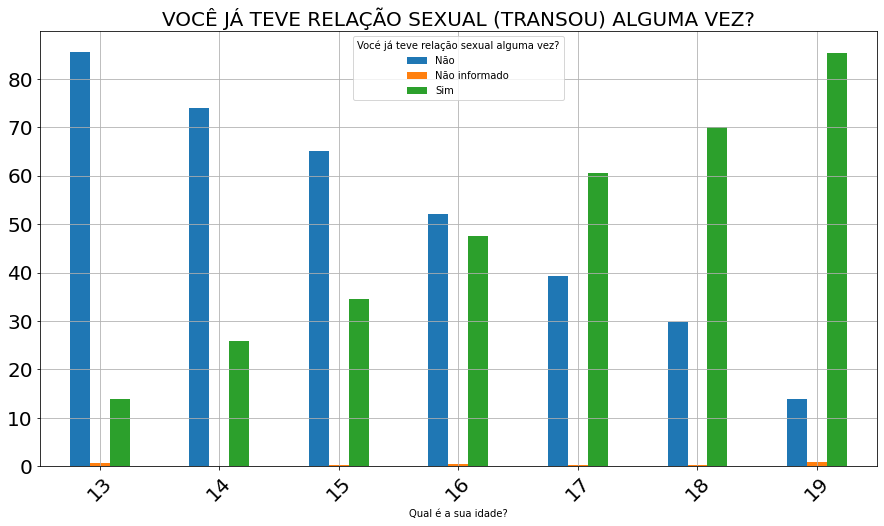

In [76]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01003', 'VB08001', 'index',
                         'Qual é a sua idade?',
                         'Vocé já teve relação sexual alguma vez?').plot(kind='bar', grid='True', figsize=(15, 8), fontsize=20, rot=45)
plt.title('VOCÊ JÁ TEVE RELAÇÃO SEXUAL (TRANSOU) ALGUMA VEZ?', fontsize=20)
plt.show()

##### 2.2.1.2.2 Idade da primeira relação sexual

In [79]:
dados_amostra_2['VB08002'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08002',
                                                    'QUE IDADE VOCÊ TINHA QUANDO TEVE RELAÇÃO SEXUAL (TRANSOU) PELA PRIMEIRA VEZ?')

In [80]:
_ = calcula_proporcao(dados_amostra_2, 'VB08002')
grafico_barras(_, 'VB08002', 
               'QUE IDADE VOCÊ TINHA QUANDO TEVE RELAÇÃO SEXUAL PELA PRIMEIRA VEZ?',
               'Idade', '%')

In [81]:
print(f'''
Dos 37,6% que já tiveram relação sexual {round(22.81 + 22.38 + 15.8)}% tiveram 
pela primeira vez entre os 13 e 15 anos de idade.''')


Dos 37,6% que já tiveram relação sexual 61% tiveram 
pela primeira vez entre os 13 e 15 anos de idade.


In [82]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB08002', 'VB01001', 'index',
                         'Que idade você tinha quando fez sexo pela primeira vez?',
                         'Qual é o seu sexo?')

Qual é o seu sexo?,Feminino,Masculino
Que idade você tinha quando fez sexo pela primeira vez?,,
10 anos,5.1,94.9
11 anos,17.8,82.2
12 anos,25.0,75.0
13 anos,35.1,64.9
14 anos,43.9,56.1
15 anos,53.1,46.9
16 anos,51.8,48.2
17 anos,53.1,46.9
18 anos ou mais,58.9,41.1


Os estudantes do sexo masculino tiveram relação sexual com menos idade (entre os 9 anos ou menos até os 13 anos) do que os estudantes
do sexo feminino.

##### 2.2.1.2.3 Número de parceiros

In [83]:
dados_amostra_2['VB08003A'] = altera_opcoes_resposta(dados_amostra_2,
                                                     dicionario_variaveis_amostra_2,
                                                     'VB08003A',
                                                     'NA SUA VIDA, COM QUANTAS PESSOAS VOCÊ TEVE RELAÇÕES SEXUAIS (TRANSOU)?')

In [84]:
_ = calcula_proporcao(dados_amostra_2, 'VB08003A')
grafico_barras(_, 'VB08003A',
               'NA SUA VIDA, COM QUANTAS PESSOAS VOCÊ TEVE RELAÇÕES SEXUAIS?',
               'Pessoas', '%')

In [85]:
print(f'''
Dos 37,6% que já tiveram relação sexual {round(100 - 35.98 + 0.52, 1)}% declaram ter se
relacinado com mais de uma pessoa.
''') 


Dos 37,6% que já tiveram relação sexual 64.5% declaram ter se
relacinado com mais de uma pessoa.



In [86]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01003', 'VB08003A', 'index',
                         'Qual é a sua idade?', 
                         'Com quantas pessoa você teve relações sexuais?')

Com quantas pessoa você teve relações sexuais?,1 pessoa,2 pessoas,3 pessoas,4 pessoas,5 pessoas,6 ou mais pessoas,Não informado
Qual é a sua idade?,,,,,,,
13,40.8,20.7,11.6,7.9,4.0,13.0,2.0
14,42.1,17.2,14.6,6.9,4.3,14.5,0.4
15,40.2,19.5,11.2,8.2,4.6,15.7,0.5
16,35.3,21.5,10.8,8.3,4.5,19.4,0.4
17,36.2,16.2,12.3,8.8,4.2,21.8,0.4
18,26.6,16.2,12.7,10.2,7.6,26.1,0.5
19,21.8,10.1,14.0,9.7,6.8,37.7,0.0


Obs: Percentual calculado pela linha.

##### 2.2.1.2.4 Já engravidou

In [87]:
dados_amostra_2['VB08013'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08013',
                                                    'ALGUMA VEZ NA VIDA VOCÊ ENGRAVIDOU?')

In [88]:
_ = calcula_proporcao(dados_amostra_2, 'VB08013')
grafico_pizza(_, 'VB08013',
              'ALGUMA VEZ NA VIDA VOCÊ ENGRAVIDOU?')

Já engravidou por idade

In [89]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01003', 'VB08013', 'index',
                         'Qual é a sua idade?', 
                         'Alguma vez na vida já engravidou?')

Alguma vez na vida já engravidou?,Não,Não informado,Sim
Qual é a sua idade?,,,
13,91.6,0.0,8.4
14,93.1,0.6,6.3
15,94.5,0.9,4.6
16,93.1,0.0,6.9
17,91.9,0.0,8.1
18,83.0,0.0,17.0
19,45.3,0.0,54.7


Obs: Proporção calculada pela linha.

In [90]:
print(f'''
Das 11.5% das estudantes que já engravidou alguma vez {8.4 + 6.3 + 4.6 + 6.9 + 8.1}%
engravidou antes dos 18 anos de idade, {8.4 + 6.3}% antes dos 15 anos de idade.
''')


Das 11.5% das estudantes que já engravidou alguma vez 34.3%
engravidou antes dos 18 anos de idade, 14.7% antes dos 15 anos de idade.



Proporção de estudantes do sexo feminino e masculino por cor/ raça

In [91]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01002', 'VB01001', 'columns',
                         'Qual é a sua cor ou raça?', 
                         'Qual é seu sexo?')

Qual é seu sexo?,Feminino,Masculino
Qual é a sua cor ou raça?,,
Amarela,5.0,3.6
Branca,38.1,41.3
Indígena,3.3,3.7
Não informado,0.1,0.1
Parda,43.4,37.8
Preta,10.1,13.3


Obs: Proporção calculada pela coluna.

Já engravidou por cor/ raça

In [92]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01002', 'VB08013', 'index',
                         'Qual é a sua cor ou raça?', 
                         'Alguma vez na vida já engravidou?')

Alguma vez na vida já engravidou?,Não,Não informado,Sim
Qual é a sua cor ou raça?,,,
Amarela,88.3,0.0,11.7
Branca,93.9,0.0,6.1
Indígena,88.6,0.0,11.4
Parda,85.0,0.4,14.7
Preta,84.2,0.5,15.3


Obs: Proporção calculada pela linha.

In [93]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01002', 'VB08013', 'columns',
                         'Qual é a sua cor ou raça?', 
                         'Alguma vez na vida já engravidou?')

Alguma vez na vida já engravidou?,Não,Não informado,Sim
Qual é a sua cor ou raça?,,,
Amarela,5.2,0.0,5.3
Branca,38.1,0.0,19.1
Indígena,2.4,0.0,2.4
Parda,43.1,75.0,57.4
Preta,11.2,25.0,15.8


Obs: Proporção calculada pela coluna

In [94]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01002', 'VB08013', 'all',
                         'Qual é a sua cor ou raça?', 
                         'Alguma vez na vida já engravidou?')

Alguma vez na vida já engravidou?,Não,Não informado,Sim
Qual é a sua cor ou raça?,,,
Amarela,4.6,0.0,0.6
Branca,33.6,0.0,2.2
Indígena,2.1,0.0,0.3
Parda,38.1,0.2,6.6
Preta,9.9,0.1,1.8


Obs: Proporção calculada pela tabela total (linhas e colunas)

As estudantes que se declararam de cor negra são as que tiveram maior proporção (sim/ não) das estudantes que já engravidaram alguma vez (15,3%), seguidas das estudantes de cor/ raça parda (14,7%) e indígena (11,4%).

Estudantes de cor branca são as que tiveram o menor proporção (sim/ não) das que já engravidaram alguma vez, mesmo representando 38.1% das estudantes do sexo feminino. 

Já engravidou por pretensão de escolaridade

In [95]:
dados_amostra_2['VB01025'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB01025',
                                                    'QUAL O GRAU DE ESCOLARIDADE MAIS ELEVADO QUE VOCÊ PRETENDO CONCLUIR?')

In [96]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01025', 'VB08013', 'columns',
                         'Qual o grau de escolaridade mais elevado você pretende concluir?', 
                         'Alguma vez na vida já engravidou?')

Alguma vez na vida já engravidou?,Não,Não informado,Sim
Qual o grau de escolaridade mais elevado você pretende concluir?,,,
Ensino Fundamental,2.9,25.0,1.9
Ensino Médio,8.6,25.0,15.3
Ensino Médio Técnico,4.3,0.0,4.3
Ensino Superior,17.9,0.0,18.7
Não sei,11.6,0.0,15.8
Pós-graduação,54.7,50.0,44.0


A gravidez aparentemente não influencia no grau de escolaridade que a estudante pretende concluir. 

Hipótese a ser testada: A distribuição do grau de escolaridade que se pretende concluir é a mesma das estudantes que já engravidaram para as estudantes que não engravidaram.

Por quê fazer esse teste? Para saber se a gravidez diminui a perspectiva de pretensão de escolaridade.

###### 2.2.1.2.4.1 Teste de hipótese

Hipótese nula $H_0$: A gravidez não diminui o grau de escolaridade pretendido.

In [97]:
#Dicionário para o grau de escolaridade seguir uma sequência crescente
dic_escolaridade_pretensao = {
    'Não sei': 0,
    'Não informado': 1,
    'Ensino Fundamental ': 2,
    'Ensino Médio': 3,
    'Ensino Médio Técnico': 4,
    'Ensino Superior': 5,
    'Pós-graduação': 6

}

In [98]:
'''
DataFrame contendo as estudantes que já engravidaram e a respectiva pretensão 
de escolaridade
'''
pretensao_escolaridade_ja_engravidou = pd.DataFrame(dados_amostra_2.query('VB01001 == "Feminino" and VB08013 == "Sim"')['VB01025'])
pretensao_escolaridade_ja_engravidou['VB01025'] = pretensao_escolaridade_ja_engravidou['VB01025'].map(dic_escolaridade_pretensao) 

In [99]:
'''
DataFrame contendo as estudantes que não engravidaram e a respectiva pretensão 
de escolaridade

obs: Amostra do mesmo tamanho da distribuição das estudantes que já engravidaram
'''
pretensao_escolaridade_nunca_engravidou = pd.DataFrame(dados_amostra_2.query('VB01001 == "Feminino" and VB08013 == "Não"')['VB01025'].sample(n=209, random_state=7))
pretensao_escolaridade_nunca_engravidou['VB01025'] = pretensao_escolaridade_nunca_engravidou['VB01025'].map(dic_escolaridade_pretensao) 

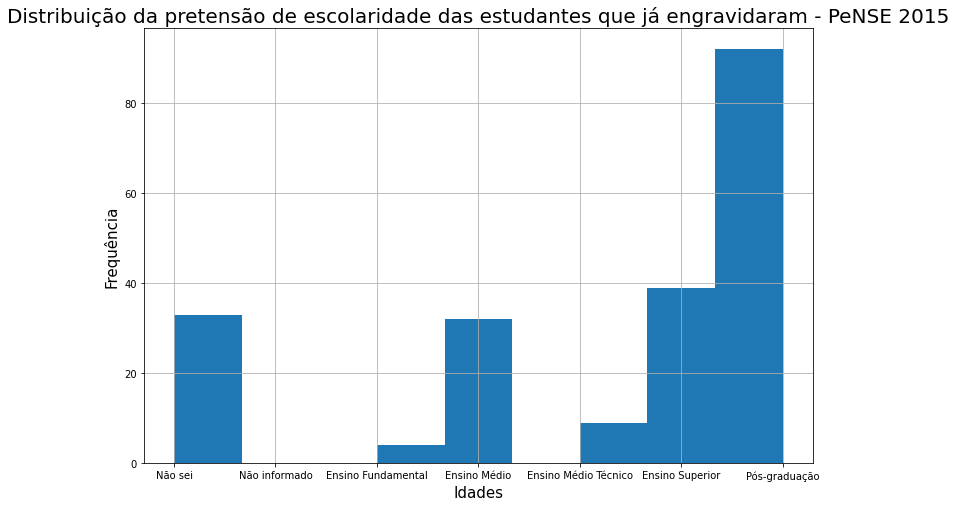

In [100]:
pretensao_escolaridade_ja_engravidou['VB01025'].hist(bins='sturges', figsize=(12, 8))
plt.title('Distribuição da pretensão de escolaridade das estudantes que já engravidaram - PeNSE 2015', fontsize=20)
plt.xlabel('Idades', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Não sei', 'Não informado', 
                                    'Ensino Fundamental',
                                    'Ensino Médio', 'Ensino Médio Técnico', 
                                    'Ensino Superior', 'Pós-graduação'])
plt.show()

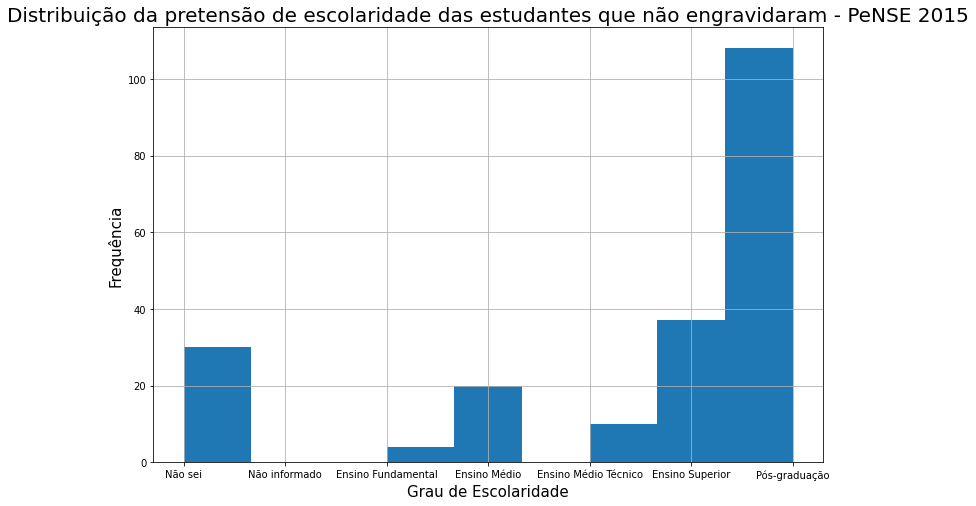

In [101]:
pretensao_escolaridade_nunca_engravidou['VB01025'].hist(bins='sturges', figsize=(12, 8))
plt.title('Distribuição da pretensão de escolaridade das estudantes que não engravidaram - PeNSE 2015', fontsize=20)
plt.xlabel('Grau de Escolaridade', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Não sei', 'Não informado', 
                                    'Ensino Fundamental',
                                    'Ensino Médio', 'Ensino Médio Técnico', 
                                    'Ensino Superior', 'Pós-graduação'])
plt.show()

Graficamente trata se de distribuições iguais.



---


Teste de distribuição não paramêtrico - $Ranksums$

In [102]:
_, p_value = ranksums(pretensao_escolaridade_ja_engravidou['VB01025'],
                      pretensao_escolaridade_nunca_engravidou['VB01025'])

In [103]:
print(f'P-value do teste de distribuição da idade e pretensão de escolaridade: {round(p_value, 2)}')

P-value do teste de distribuição da idade e pretensão de escolaridade: 0.14


In [104]:
p_value < 0.05

False

P-value é maior do que 0.05, logo a hipótese nula (ambas as distribuições são iguais) deve ser aceita, deste modo a distribuição da pretensão de escolaridade das estudantes que já engravidaram alguma vez e das que nunca engravidaram é a mesma. 

**Estatisticamente a gravidez não altera a pretensão do grau de escolaridade.**

#### 2.2.1.3 Prevenção à gravidez e DST'a

##### 2.2.1.3.1 Uso de preservativo na primeira relação sexual

In [105]:
dados_amostra_2['VB08011'] = altera_opcoes_resposta(dados_amostra_2, 
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08011',
                                                    'VOCÊ USOU PRESERVATIVO NA PRIMEIRA RELAÇÃO SEXUAL?')

In [106]:
_ = calcula_proporcao(dados_amostra_2, 'VB08011')
grafico_pizza(_, 'VB08011', 
              'VOCÊ USOU PRESERVATIVO NA PRIMEIRA RELAÇÃO SEXUAL?')

In [107]:
print('Dos 37,6% que já tiveram relação sexual 35% não usaram preservativo na primeira relação sexual.')

Dos 37,6% que já tiveram relação sexual 35% não usaram preservativo na primeira relação sexual.


In [108]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB08011', 'VB01001', 'index',
                         'Usou preservativo na primeira relação sexual?',
                         'Qual é o seu sexo?')

Qual é o seu sexo?,Feminino,Masculino
Usou preservativo na primeira relação sexual?,,
Não,33.2,66.8
Não informado,40.0,60.0
Sim,45.1,54.9


Estudantes do sexo masculino apresentam maior proporção do não uso de preservativo na primeira relação sexual comparado as estudantes do sexo feminino.

In [109]:
tabela_cruzada_proporcao(dados_amostra_2, 'REGEOGR', 'VB08011', 'columns',
                         'Usou preservativo na primeira relação sexual?',
                         'Região Geográfica')

Região Geográfica,Não,Não informado,Sim
Usou preservativo na primeira relação sexual?,,,
Centro-Oeste,16.6,13.3,18.5
Nordeste,23.1,20.0,18.6
Norte,22.1,33.3,19.4
Sudeste,20.9,13.3,19.7
Sul,17.4,20.0,23.7


Obs: Proporção calculada pela coluna.

As regiões Centro-Oeste e Sul apresentam menor proporção dos estudantes que não utilizaram preservativo na primeira relação sexual, e as regiões Nordeste e Norte maior proporção do não uso de preservativo na primeira relação sexual.

##### 2.2.1.3.2 Orientação sobre prevenção de gravidez

In [110]:
dados_amostra_2['VB08008'] = altera_opcoes_resposta(dados_amostra_2, 
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08008', 
                                                    'NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE PREVENÇÃO DE GRAVIDEZ?')

In [111]:
_ = calcula_proporcao(dados_amostra_2, 'VB08008')
grafico_pizza(_, 'VB08008', 
              'NA ESCOLA, RECEBEU ORIENTAÇÃO SOBRE PREVENÇÃO DE GRAVIDEZ?')

In [112]:
print(f'''
73.4% recebeu orientação na escola sobre prevenção de gravidez, {round(19.6 + 6.68, 1)}%
não recebeu ou não soube dizer.
''')


73.4% recebeu orientação na escola sobre prevenção de gravidez, 26.3%
não recebeu ou não soube dizer.



In [113]:
tabela_cruzada_proporcao(dados_amostra_2, 'REGEOGR', 'VB08008', 'columns',
                         'Na escola, recebeu orientação sobre prevenção de gravidez',
                         'Região Geográfica')

Região Geográfica,Não,Não informado,Não sei,Sim
"Na escola, recebeu orientação sobre prevenção de gravidez",,,,
Centro-Oeste,17.1,28.6,17.7,21.3
Nordeste,23.7,8.2,19.7,20.6
Norte,22.3,16.3,20.7,19.6
Sudeste,21.2,12.2,18.9,18.5
Sul,15.7,34.7,23.0,20.1


Obs: Proporção calculada pela coluna

Observa se uma proporção significativa de pessoas que não informaram ou não souberam.

##### 2.2.1.3.3 Recebeu orientação na escola sobre doenças sexualmente transmissíveis

In [114]:
dados_amostra_2['VB08009'] = altera_opcoes_resposta(dados_amostra_2, 
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08009',
                                                    'NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE AIDS OU OUTRAS DOENÇAS SEXUALMENTE TRANSMISSÍVEIS (DST)?')

In [115]:
_ = calcula_proporcao(dados_amostra_2, 'VB08009')
grafico_pizza(_, 'VB08009', 
              "NA ESCOLA, RECEBEU ORIENTAÇÃO SOBRE AIDS OU OUTRAS DST's?")

In [116]:
print('82.2% recebeu orientação na escola sobre AIDS e DST\'s')

82.2% recebeu orientação na escola sobre AIDS e DST's


In [117]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB08009', 'VB01001',
                         'columns', 
                         'Na escola, recebeu orientação sobre AIDS e DST\'s?',
                         'Qual é o seu sexo?')

Qual é o seu sexo?,Feminino,Masculino
"Na escola, recebeu orientação sobre AIDS e DST's?",,
Não,11.6,13.8
Não informado,0.3,0.6
Não sei,4.0,5.2
Sim,84.1,80.4


Obs: Percentual calculado pela coluna.

##### 2.2.1.3.4 Recebeu orientação sobre como conseguir preservativo gratuitamente

In [118]:
dados_amostra_2['VB08010'] = altera_opcoes_resposta(dados_amostra_2, 
                                          dicionario_variaveis_amostra_2,
                                          'VB08010',
                                          'NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE COMO CONSEGUIR CAMISINHA (PRESERVATIVO) GRATUITAMENTE? ')

In [119]:
_ = calcula_proporcao(dados_amostra_2, 'VB08010')
grafico_pizza(_, 'VB08010', 
              'NA ESCOLA, FOI ORIENTADO A COMO CONSEGUIR PRESERVATIVO GRATUITAMENTE? ')

In [120]:
print(f'''
Mais da metade da amostra (65,4%) foi orientado a como conseguir preservativo 
gratuitamente, mais de 1/3 ({round(27.4 + 6.7, 1)}%) não foi orientado ou não soube dizer.''')


Mais da metade da amostra (65,4%) foi orientado a como conseguir preservativo 
gratuitamente, mais de 1/3 (34.1%) não foi orientado ou não soube dizer.


In [121]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB08010', 'VB01001', 'columns',
                         'Na escola, recebeu orientação de como conseguir preservativo gratuitamente?',
                         'Qual é o seu sexo?')

Qual é o seu sexo?,Feminino,Masculino
"Na escola, recebeu orientação de como conseguir preservativo gratuitamente?",,
Não,26.9,27.9
Não informado,0.4,0.7
Não sei,6.8,6.6
Sim,65.9,64.8


A orientação como esperada foi direcionada para ambos os sexos.

Obs: Proporção calculada pela coluna

##### 2.2.1.3.5 Utilizou algum método para evitar a gravidez na última relação sexual

In [122]:
dados_amostra_2['VB08005'] = altera_opcoes_resposta(dados_amostra_2, 
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08005',
                                                    'NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU ALGUM MÉTODO PARA EVITAR A GRAVIDEZ E/OU DOENÇAS SEXUALMENTE TRANSMISSÍVEIS (DST)')

In [123]:
_ = calcula_proporcao(dados_amostra_2, 'VB08005')
grafico_pizza(_, 'VB08005',
              'NA ÚLTIMA RELAÇÃO SEXUAL, USOU ALGUM MÉTODO PARA EVITAR A GRAVIDEZ/ DST\'s')

In [124]:
print(f'''
67.2% utilizou de algum método para evitar a gravidez e/ou DST\'s na última
relação sexual, mais de 1/3 ({round(23 + 9.34, 1)}%) não usou ou não soube dizer.
''')


67.2% utilizou de algum método para evitar a gravidez e/ou DST's na última
relação sexual, mais de 1/3 (32.3%) não usou ou não soube dizer.



##### 2.2.1.3.6 Uso de preservativo na última relação sexual

In [125]:
dados_amostra_2['VB08006'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08006',
                                                    'NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU CAMISINHA (PRESERVATIVO)?')

In [126]:
_ = calcula_proporcao(dados_amostra_2, 'VB08006')
grafico_pizza(_, 'VB08006',
              'NA ÚLTIMA RELAÇÃO SEXUAL, VOCÊ OU SEU(SUA) PARCEIRO(A) USOU PRESERVATIVO?')

In [127]:
print(f'''
Pouco menos de 2/3 (64.3%) afirmou utilizar preservativo na última relação sexual
enquanto mais de 1/3 ({round(31.9 + 3.3, 1)}%) não utilizou ou não soube dizer. 
''')


Pouco menos de 2/3 (64.3%) afirmou utilizar preservativo na última relação sexual
enquanto mais de 1/3 (35.2%) não utilizou ou não soube dizer. 



##### 2.2.1.3.7 Uso de outro método na última relação sexual

In [128]:
dados_amostra_2['VB08007'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08007',
                                                    'NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU ALGUM OUTRO MÉTODO PARA EVITAR A GRAVIDEZ (NÃO CONTAR CAMISINHA)?T)')

In [129]:
_ = calcula_proporcao(dados_amostra_2, 'VB08007')
grafico_pizza(_, 'VB08007',
              'NA ÚLTIMA RELAÇÃO SEXUAL, USOU ALGUM OUTRO MÉTODO PARA EVITAR A GRAVIDEZ (NÃO CONTAR CAMISINHA)?')

In [130]:
print(f'''
Mais da metade ({round(46.6 + 10.3, 1)}%) não fez uso de outro método para evitar
gravidez além do preservativo, 42.3% fez uso de algum outro método.
''')


Mais da metade (56.9%) não fez uso de outro método para evitar
gravidez além do preservativo, 42.3% fez uso de algum outro método.



Método utilizado

In [131]:
dados_amostra_2['VB08012'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08012',
                                                    'NESTA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), QUAL OUTRO MÉTODO PARA EVITAR GRAVIDEZ VOCÊ OU SUA PARCEIRA USOU?')

In [132]:
_ = calcula_proporcao(dados_amostra_2, 'VB08012')
grafico_barras(_, 'VB08012',
               'NESTA ÚLTIMA RELAÇÃO SEXUAL, QUAL OUTRO MÉTODO PARA EVITAR GRAVIDEZ VOCÊ OU SUA PARCEIRA USOU?',
               'Método', '%')

In [133]:
print('''
Dos 42.3% que fez uso de outro método além do preservativo para evitar a gravidez
66.9% fez uso da pílula anticoncepcional.
''')


Dos 42.3% que fez uso de outro método além do preservativo para evitar a gravidez
66.9% fez uso da pílula anticoncepcional.



#### 2.2.1.4 Violência sexual

##### 2.2.1.4.1 Foi forçado a ter relação sexual

In [134]:
dados_amostra_2['VB09016'] = altera_opcoes_resposta(dados_amostra_2,
                                          dicionario_variaveis_amostra_2,
                                          'VB09016',
                                          'ALGUMA VEZ NA VIDA VOCÊ FOI FORÇADO A TER RELAÇÃO SEXUAL? ')

In [135]:
_ = calcula_proporcao(dados_amostra_2, 'VB09016')
grafico_pizza(_, 'VB09016',
              'ALGUMA VEZ NA VIDA VOCÊ FOI FORÇADO A TER RELAÇÃO SEXUAL?')

In [136]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01002', 'VB09016', 'index',
                         'Qual é a sua cor ou raça?',
                         'Alguma vez na vida você foi forçado a ter relação sexual?')

Alguma vez na vida você foi forçado a ter relação sexual?,Não,Não informado,Sim
Qual é a sua cor ou raça?,,,
Amarela,94.3,0.6,5.1
Branca,95.4,0.5,4.2
Indígena,91.6,1.2,7.2
Não informado,88.9,11.1,0.0
Parda,94.5,0.7,4.8
Preta,92.1,1.5,6.4


Obs: Proporção calculada pela linha.

As pessoas que se declararam de cor/ raça indígena e preta foram os que tiveram maior proporção entre os estudantes que já foram forçados a ter relação sexual.

In [137]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01001', 'VB09016', 'all',
                         'Qual é o seu sexo?',
                         'Alguma vez na vida você foi forçado a ter relação sexual?')

Alguma vez na vida você foi forçado a ter relação sexual?,Não,Não informado,Sim
Qual é o seu sexo?,,,
Feminino,46.1,0.2,2.6
Masculino,48.4,0.5,2.2


Obs: Proporção calculada pela tabela total (linhas e colunas).

Os estudantes de sexo feminino foram as que mais foram forçadas a ter relação sexual (2,6%), os estudantes de sexo masculino tiveram maior proporção em não informado (0,5%).

In [138]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01025', 'VB09016', 'columns',
                         'Qual o grau de escolaridade mais elevado que você pretente concluir?',
                         'Alguma vez na vida você foi forçado a ter relação sexual?')

Alguma vez na vida você foi forçado a ter relação sexual?,Não,Não informado,Sim
Qual o grau de escolaridade mais elevado que você pretente concluir?,,,
Ensino Fundamental,5.1,12.8,8.3
Ensino Médio,9.7,14.0,11.6
Ensino Médio Técnico,4.2,3.5,5.1
Ensino Superior,16.4,15.1,14.2
Não informado,0.0,3.5,0.0
Não sei,18.2,27.9,17.2
Pós-graduação,46.4,23.3,43.6


Visualmente os estudantes que foram forçados a ter relação sexual não tem perspectiva diferente do grau de escolaridade que pretende concluir comparado aos outros estudantes.

###### 2.2.1.4.1.1 Teste de hipótese
Hipótese nula $H_0$: Os estudantes que foram forçados a ter relação sexual tem a mesma pretensão do grau de escolaridade comparado aos demais estudantes.

Premissa 1: Quanto maior o grau de escolaridade pretendido maior o nível de auto-responsabilidade e motivação do estudante com relação a sua formação/ capacitação educacional.

In [139]:
'''
DataFrame contendo as estudantes que form forçados a ter relação sexual e a 
respectiva pretensão de escolaridade
'''
pretensao_escolaridade_sexo_forcado = pd.DataFrame(dados_amostra_2.query('VB09016 == "Sim"')['VB01025'])
pretensao_escolaridade_sexo_forcado['VB01025'] = pretensao_escolaridade_sexo_forcado['VB01025'].map(dic_escolaridade_pretensao) 

In [140]:
'''
DataFrame contendo as estudantes que não foram forçados a ter relação sexual e a 
respectiva pretensão de escolaridade

Obs: Amostra do mesmo tamanho dos estudantes que foram forçados a ter relação 
sexual
'''
pretensao_escolaridade_nao_forcado = pd.DataFrame(dados_amostra_2.query('VB09016 == "Não"')['VB01025'].sample(n=569, random_state=7))
pretensao_escolaridade_nao_forcado['VB01025'] = pretensao_escolaridade_nao_forcado['VB01025'].map(dic_escolaridade_pretensao) 

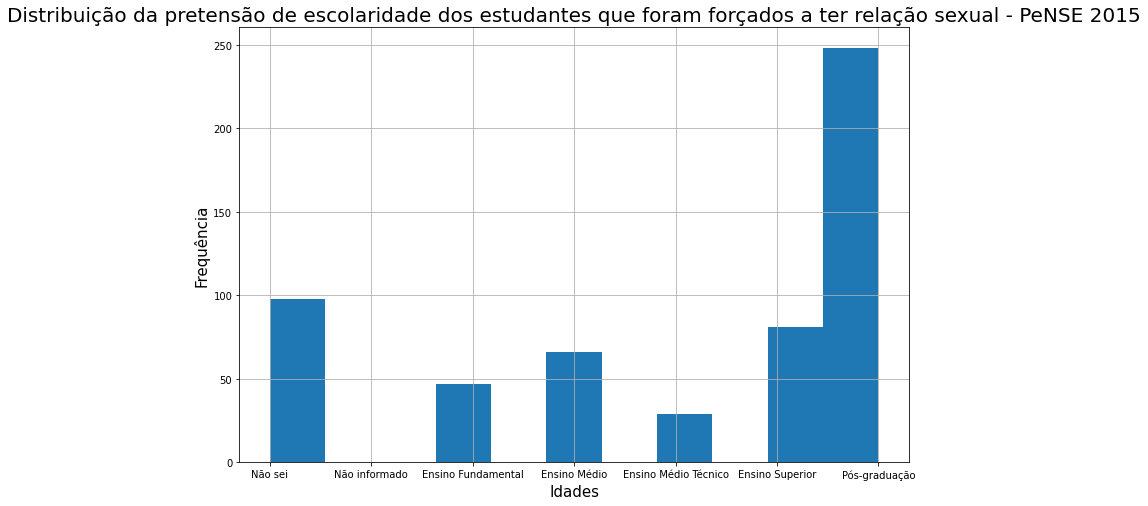

In [141]:
pretensao_escolaridade_sexo_forcado['VB01025'].hist(bins='sturges', figsize=(12, 8))
plt.title('Distribuição da pretensão de escolaridade dos estudantes que foram forçados a ter relação sexual - PeNSE 2015', fontsize=20)
plt.xlabel('Idades', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Não sei', 'Não informado', 
                                    'Ensino Fundamental',
                                    'Ensino Médio', 'Ensino Médio Técnico', 
                                    'Ensino Superior', 'Pós-graduação'])
plt.show()

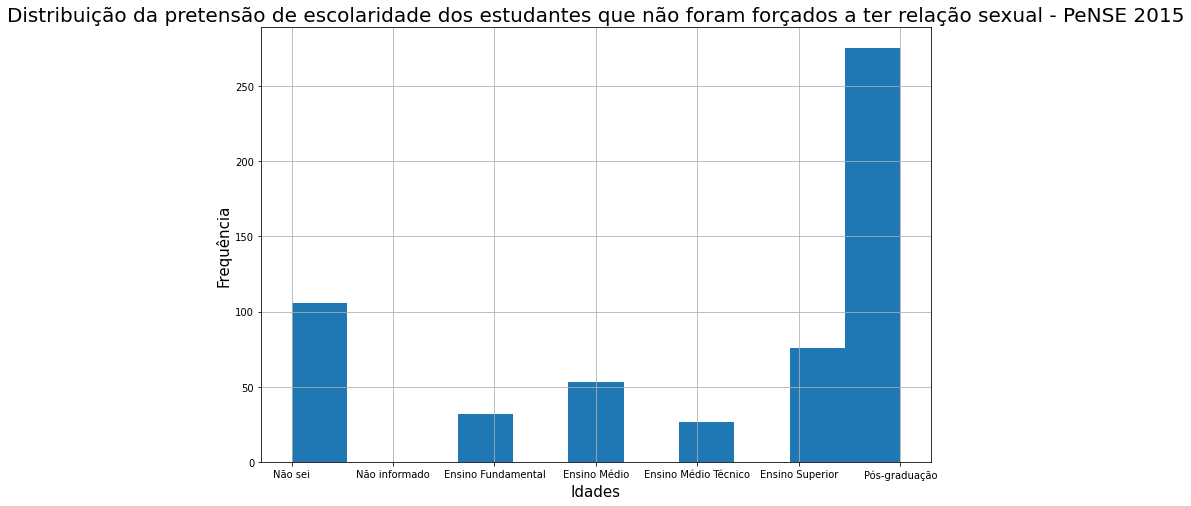

In [142]:
pretensao_escolaridade_nao_forcado['VB01025'].hist(bins='sturges', figsize=(12, 8))
plt.title('Distribuição da pretensão de escolaridade dos estudantes que não foram forçados a ter relação sexual - PeNSE 2015', fontsize=20)
plt.xlabel('Idades', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Não sei', 'Não informado', 
                                    'Ensino Fundamental',
                                    'Ensino Médio', 'Ensino Médio Técnico', 
                                    'Ensino Superior', 'Pós-graduação'])
plt.show()

Graficamente as distribuições são iguais.



---



Teste não paramétrico: $Ranksums$

In [143]:
_, p_value = ranksums(pretensao_escolaridade_sexo_forcado,
                      pretensao_escolaridade_nao_forcado)

In [144]:
print('P-value:', round(p_value, 2))

P-value: 0.25


In [145]:
p_value < 0.05

False

P-value maior do que 0,05 a hipótes nula deve ser aceita.

**Estatisticamente os estudantes que foram forçados a ter relação sexual por mais traumático consciente ou incoscientemente que tenha sido a experiência tem as mesmas pretensões de escolaridade dos demais estudantes.**

##### 2.2.1.4.2 Namorado(a)/ ex-namorado(a) forçou relação sexual


In [146]:
dados_amostra_2['VB0901701'] = altera_opcoes_resposta(dados_amostra_2,
                                            dicionario_variaveis_amostra_2,
                                            'VB0901701',
                                            'UM(A) NAMORADO(A)/EX-NAMORADO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [147]:
_ = calcula_proporcao(dados_amostra_2, 'VB0901701')
grafico_pizza(_, 'VB0901701',
              'UM(A) NAMORADO(A)/EX-NAMORADO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

Dos 4.8% que foram forçados a ter relação sexual 30.6% afirmam que o respnsável tenha sido um namorado(a)/ ex-namorado(a).

##### 2.2.1.4.3 Um(a) amigo(a) forçou você a ter relação sexual


In [148]:
dados_amostra_2['VB0901702'] = altera_opcoes_resposta(dados_amostra_2,
                                                      dicionario_variaveis_amostra_2,
                                                      'VB0901702',
                                                      'UM(A) AMIGO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [149]:
_ = calcula_proporcao(dados_amostra_2, 'VB0901702')
grafico_pizza(_, 'VB0901702',
              'UM(A) AMIGO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

Dos 4.8% que foram forçados a ter relação sexual 20.9% afirmam que o respnsável tenha sido um(a) amigo(a).

##### 2.2.1.4.4 Seu pai/mãe/padastro/madastra fourçou a ter relação sexual

In [150]:
dados_amostra_2['VB0901703'] = altera_opcoes_resposta(dados_amostra_2,
                                                      dicionario_variaveis_amostra_2,
                                                      'VB0901703',
                                                      'SEU PAI/MÃE/PADASTRO/MADRASTA FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [151]:
_ = calcula_proporcao(dados_amostra_2, 'VB0901703')
grafico_pizza(_, 'VB0901703',
              'SEU PAI/MÃE/PADASTRO/MADRASTA FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

Dos 4.8% que foram forçados a ter relação sexual 11.9% afirmam que o respnsável tenha sido o pai/mãe/padrasto/madrasta.

##### 2.2.1.4.5 Outros familiares forçaram você a ter relação sexual

In [152]:
dados_amostra_2['VB0901704'] = altera_opcoes_resposta(dados_amostra_2,
                                                      dicionario_variaveis_amostra_2,
                                                      'VB0901704',
                                                      'OUTROS FAMILIARES FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?')

In [153]:
_ = calcula_proporcao(dados_amostra_2, 'VB0901704')
grafico_pizza(_, 'VB0901704',
              'OUTROS FAMILIARES FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?')

Dos 4.8% que foram forçados a ter relação sexual 16.5% afirmam que o respnsável tenha sido outro membro da família.

In [154]:
print(f'''
Dos 4.8% que foram forçados a ter relação sexual {round(11.9 + 16.5, 1)}% afirmam
que o responsável tenha  sido um familiar.
''')


Dos 4.8% que foram forçados a ter relação sexual 28.4% afirmam
que o responsável tenha  sido um familiar.



##### 2.2.1.4.6 Um(a) desconhecido(a) forçou você a ter relação sexual

In [155]:
dados_amostra_2['VB0901705'] = altera_opcoes_resposta(dados_amostra_2,
                                                      dicionario_variaveis_amostra_2,
                                                      'VB0901705',
                                                      'UM(A) DESCONHECIDO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [156]:
_ = calcula_proporcao(dados_amostra_2, 'VB0901705')
grafico_pizza(_, 'VB0901705',
              'UM(A) DESCONHECIDO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

##### 2.2.1.4.7 Outras pessoa forçaram você a ter relação sexual

In [157]:
dados_amostra_2['VB0901706'] = altera_opcoes_resposta(dados_amostra_2,
                                                      dicionario_variaveis_amostra_2,
                                                      'VB0901706',
                                                      'OUTRAS PESSOAS FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?')

In [158]:
_ = calcula_proporcao(dados_amostra_2, 'VB0901706')
grafico_pizza(_, 'VB0901706',
              'OUTRAS PESSOAS FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?')

In [159]:
print(f'''
Dos 4.8% que foram forçados a ter relação sexual aproximadamente {round(28.4 + 20.9 + 30.6)}% afirmam
que o responsável tenha  sido um familiar ou pessoa conhecida (pai/mãe/padrasto/
madrasta, familiar, namorado(a)/ex-namorado(a), amigo(a)).

6.8% tiveram mais de um(a) abusado(a).
''')


Dos 4.8% que foram forçados a ter relação sexual aproximadamente 80% afirmam
que o responsável tenha  sido um familiar ou pessoa conhecida (pai/mãe/padrasto/
madrasta, familiar, namorado(a)/ex-namorado(a), amigo(a)).

6.8% tiveram mais de um(a) abusado(a).



### 2.2.2 Explorando a amostra 1

"Escolares do 9º ano do ensino fundamental (antiga 8ª série) das escolas públicas e privadas dos Municípios das Capitais constituíram sua população-alvo." (IBGE, 2015)

"A amostra coleta informações relacionadas a vários tópicos que afetam a saúde e consequentemente o desempenho do escolar, aqui será explorando os resultados relacionadas a saúde sexual, por ser um tema ainda tratado como um tabu na sociedade, principalmente em regiões de baixo desenvolvimento humano" (IBGE, 2015).

In [245]:
#Primeiros registros
dados_amostra_1.head(3)

,ANOPESQ,PAIS,REGEOGR,UFCENSO,MUNICIPIO_CAP,TIPO_MUNIC,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,Norte,Rondônia,1100205,1,1,Feminino,Branca,14 anos,2,2001,1,2,7,4,2,-1,1,1,1,1,1,2,4,1,9º ano / 8ª série do Ensino Fundamental,Manhã,2,2,5,3,3,4,5,8,2,5,3,2,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,1,1,1787
1,2015,76,Norte,Rondônia,1100205,1,1,Masculino,Parda,16 anos,2,1999,1,1,7,3,2,-1,1,1,1,1,1,1,3,1,9º ano / 8ª série do Ensino Fundamental,Manhã,1,2,5,3,8,3,8,8,7,2,1,5,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,2,1,1787
2,2015,76,Norte,Rondônia,1100205,1,1,Masculino,Branca,13 anos,10,2001,1,1,7,4,2,-1,2,1,1,1,1,2,4,1,9º ano / 8ª série do Ensino Fundamental,Manhã,2,2,6,3,1,6,4,3,1,5,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,3,1,1787


In [241]:
'''
(linhas, colunas)
linhas: Número de respondentes
colunas: Número de perguntas
'''
dados_amostra_1.shape

(102072, 293)

Traduzindo a condificação das respostas

In [161]:
dados_amostra_1['VB01001'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB01001', 
                                                    'QUAL É O SEU SEXO?')

In [162]:
dados_amostra_1['VB01002'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB01002',
                                                    'QUAL É A SUA COR OU RAÇA?')

In [163]:
dados_amostra_1['REGEOGR'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'REGEOGR',
                                                    'REGIÃO GEOGRÁFICA')

In [164]:
dados_amostra_1['UFCENSO'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'UFCENSO', 
                                                    'UNIDADE DA FEDERAÇÃO')

In [165]:
dados_amostra_1['VB01021'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB01021',
                                                    'EM QUE ANO/SÉRIE VOCÊ ESTÁ?')

In [166]:
dados_amostra_1['VB01022'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB01022',
                                                    'EM QUE TURNO VOCÊ ESTUDA?')

In [167]:
dados_amostra_1['VB01005'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB01005',
                                                    'EM QUE ANO VOCÊ NASCEU?')

In [239]:
dados_amostra_1['VB01003'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB01003',
                                                    'QUAL É A SUA IDADE?')



---



Visualização das tabelas de frequência

In [168]:
tabela_frequencia(dados_amostra_1, 'VB01001', 
                  'Qual é o seu sexo?')

,Frequência,Proporção %
Qual é o seu sexo?,,
Feminino,52782,51.7
Masculino,49290,48.3


Houve um controle na divisão da amostra entre os sexos

In [240]:
tabela_frequencia(dados_amostra_1, 'VB01003',
                  'Qual é a sua idade?')

,Frequência,Proporção %
Qual é a sua idade?,,
14 anos,51611,50.6
15 anos,20864,20.4
13 anos,16722,16.4
16 anos,7873,7.7
17 anos,3040,3.0
18 anos,852,0.8
19 anos ou mais,572,0.6
12 anos,510,0.5
11 anos ou menos,28,0.0


Pouco mais da metada da amostra tem 14 anos de idade.

In [170]:
tabela_frequencia(dados_amostra_1, 'VB01005',
                  'Em que ano você nasceu?')

,Frequência,Proporção %
Em que ano você nasceu?,,
2000,38991,38.2
2001,38903,38.1
1999,13590,13.3
1998,5088,5.0
2002,2575,2.5
1997,1800,1.8
1996,563,0.6
Antes de 1996,408,0.4
2004 ou mais,64,0.1


In [171]:
tabela_frequencia(dados_amostra_1, 'VB01021',
                  'Em que ano/ série você estuda?')

,Frequência,Proporção %
Em que ano/ série você estuda?,,
9º ano / 8ª série do Ensino Fundamental,100497,98.5
8º ano / 7ª série do Ensino Fundamental,1247,1.2
1º ano Ensino Médio,124,0.1
3º ano Ensino Médio,50,0.0
6º ano / 5ª série do Ensino Fundamental,43,0.0
2º ano Ensino Médio,39,0.0
7º ano / 6ª série do Ensino Fundamental,37,0.0
Não informado,35,0.0


98,5% da amostra estuda no 9º ano (8ª série).

In [172]:
tabela_frequencia(dados_amostra_1, 'VB01022',
                  'Em que turno você estuda?')

,Frequência,Proporção %
Em que turno você estuda?,,
Manhã,62891,61.6
Tarde,37144,36.4
Integral,1742,1.7
Intermediário,178,0.2
Noite,87,0.1
Não informado,30,0.0


Mais da metade (61.6%) estuda no turno da manhã e pouco mais de 1/3 (36.4%) estuda no turno da tarde.

In [173]:
tabela_frequencia(dados_amostra_1, 'VB01002',
                  'Qual a sua cor ou raça?')

,Frequência,Proporção %
Qual a sua cor ou raça?,,
Parda,46935,46.0
Branca,33775,33.1
Preta,12849,12.6
Amarela,4580,4.5
Indígena,3825,3.7
Não informado,108,0.1


In [174]:
print(f'{46 + 33.1}% da amostra se declararam de cor/ raça parda ou branca.')

79.1% da amostra se declararam de cor/ raça parda ou branca.


In [175]:
tabela_frequencia(dados_amostra_1, 'REGEOGR',
                  'Região Geográfica')

,Frequência,Proporção %
Região Geográfica,,
Nordeste,36334,35.6
Norte,23937,23.5
Sudeste,17772,17.4
Centro-Oeste,14179,13.9
Sul,9850,9.7


In [176]:
print(f'''
As regiões Nordeste e Norte representam {35.6 + 23.5}% da amostra, a maior participação 
dessas regiões se justifica pelo número de estados superior às demais regiões.''')


As regiões Nordeste e Norte representam 59.1% da amostra, a maior participação 
dessas regiões se justifica pelo número de estados superior às demais regiões.


In [177]:
_ = tabela_frequencia(dados_amostra_1, 'UFCENSO', 'Unidade da Federação')
_

,Frequência,Proporção %
Unidade da Federação,,
Goiás,5359,5.3
Minas Gerais,5258,5.2
Paraíba,4794,4.7
Espirito Santo,4586,4.5
Pernambuco,4537,4.4
Rio Grande do Norte,4358,4.3
Rio de Janeiro,4251,4.2
Maranhão,4028,3.9
Amapá,4014,3.9


In [178]:
print(f'''
Houve um controle da distribuição da amostra nas unidades da federação, onde
a média percentual é de {round(_['Proporção %'].mean(), 1)}% e o desvio padrão de {round(_['Proporção %'].std(), 1)}% entre os estados e o 
Distrito Federal.''')


Houve um controle da distribuição da amostra nas unidades da federação, onde
a média percentual é de 3.7% e o desvio padrão de 0.7% entre os estados e o 
Distrito Federal.


#### 2.2.2.1 Perguntas do dicionário de *variáveis*

In [179]:
for i in dicionario_variaveis_amostra_1.keys():
  print(i)

ANO EM QUE A PESQUISA FOI REALIZADA
PAÍS
REGIÃO GEOGRÁFICA
UNIDADE DA FEDERAÇÃO
MUNICÍPIO
INDICADORA DE MUNICÍPIO DA CAPITAL
PREZADO(A) ESTUDANTE, VOCÊ CONCORDA EM PARTICIPAR DESSA PESQUISA?
QUAL É O SEU SEXO?
QUAL É A SUA COR OU RAÇA?
QUAL É A SUA IDADE?
QUAL É O MÊS DO SEU ANIVERSÁRIO?
EM QUE ANO VOCÊ NASCEU?
EM QUE ANO/SÉRIE VOCÊ ESTÁ?
EM QUE TURNO VOCÊ ESTUDA?
VOCÊ ESTUDA EM REGIME INTEGRAL (TEM ATIVIDADES ESCOLARES POR 7 HORAS OU MAIS HORAS DIÁRIAS, DURANTE TODO O PERÍODO ESCOLAR)?
VOCÊ ESTUDA EM REGIME DE INTERNATO (A ESCOLA POSSUI ALOJAMENTO ONDE OS ALUNOS PERMANECEM E DORMEM DIARIAMENTE, DURANTE TODO O PERÍODO ESCOLAR)?
QUAL O GRAU DE ESCOLARIDADE MAIS ELEVADO QUE VOCÊ PRETENDO CONCLUIR?
QUANDO TERMINAR O CICLO/CURSO QUE VOCÊ ESTÁ FREQUENTANDO ATUALMENTE, VOCÊ PRETENDE?
VOCÊ MORA COM SUA MÃE?
VOCÊ MORA COM SEU PAI?
CONTANDO COM VOCÊ, QUANTAS PESSOAS MORAM NA SUA CASA OU APARTAMENTO?
NA SUA CASA TEM TELEFONE FIXO (CONVENCIONAL)?
VOCÊ TEM CELULAR?
NA SUA CASA TEM COMPUTADOR (DE M

#### 2.2.2.2 Perguntas relacionadas a saúde sexual

VOCÊ JÁ TEVE RELAÇÃO SEXUAL (TRANSOU) ALGUMA VEZ?

QUE IDADE VOCÊ TINHA QUANDO TEVE RELAÇÃO SEXUAL (TRANSOU) PELA PRIMEIRA VEZ?

VOCÊ USOU PRESERVATIVO NA PRIMEIRA RELAÇÃO SEXUAL?

NA SUA VIDA, COM QUANTAS PESSOAS VOCÊ TEVE RELAÇÕES SEXUAIS (TRANSOU)?

NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU ALGUM MÉTODO PARA EVITAR A GRAVIDEZ E/OU DOENÇAS SEXUALMENTE TRANSMISSÍVEIS (DST)

NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU CAMISINHA (PRESERVATIVO)?

NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU ALGUM OUTRO MÉTODO PARA EVITAR A GRAVIDEZ (NÃO CONTAR CAMISINHA)?T)

NESTA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), QUAL OUTRO MÉTODO PARA EVITAR GRAVIDEZ VOCÊ OU SUA PARCEIRA USOU?

ALGUMA VEZ NA VIDA VOCÊ ENGRAVIDOU?

NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE PREVENÇÃO DE GRAVIDEZ?

NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE AIDS OU OUTRAS DOENÇAS SEXUALMENTE TRANSMISSÍVEIS (DST)?

NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE COMO CONSEGUIR CAMISINHA (PRESERVATIVO) GRATUITAMENTE?

ALGUMA VEZ NA VIDA VOCÊ FOI FORÇADO A TER RELAÇÃO SEXUAL? 

UM(A) NAMORADO(A)/EX-NAMORADO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?

UM(A) AMIGO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?

SEU PAI/MÃE/PADASTRO/MADRASTA FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?

OUTROS FAMILIARES FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?

UM(A) DESCONHECIDO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?

OUTRAS PESSOAS FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?

##### 2.2.2.2.1 Constrangimento com o questionário

In [180]:
dados_amostra_1['VB16001A08'] = altera_opcoes_resposta(dados_amostra_1,
                                                       dicionario_variaveis_amostra_1,
                                                       'VB16001A08',
                                                       'VOCÊ ACHOU ESTE QUESTIONÁRIO CONSTRANGEDOR?')

In [181]:
_ = calcula_proporcao(dados_amostra_1, 'VB16001A08')
grafico_pizza(_, 'VB16001A08', 'VOCÊ ACHOU ESTE QUESTIONÁRIO CONSTRANGEDOR?')

98% não se sentiram constrangidos com o questionário.

#### 2.2.2.3 Relação Sexual

##### 2.2.2.3.1 Já teve relação sexual

In [182]:
dados_amostra_1['VB08001'] = altera_opcoes_resposta(
    dados_amostra_1, dicionario_variaveis_amostra_1, 'VB08001',
    'VOCÊ JÁ TEVE RELAÇÃO SEXUAL (TRANSOU) ALGUMA VEZ?'
) 

In [183]:
_ = calcula_proporcao(dados_amostra_1, 'VB08001')
grafico_pizza(_, 'VB08001',
              'VOCÊ JÁ TEVE RELAÇÃO SEXUAL (TRANSOU) ALGUMA VEZ?')

In [184]:
tabela_cruzada_proporcao(dados_amostra_1, 'VB01003', 'VB08001', 'columns', 
                         'Qual é a sua idade?',
                         'Você já teve relação sexual?')

Você já teve relação sexual?,Não,Não informado,Sim
Qual é a sua idade?,,,
11,0.0,0.8,0.0
12,0.6,0.6,0.1
13,20.3,10.3,6.6
14,55.6,41.5,37.8
15,16.6,24.5,30.1
16,4.6,11.7,15.5
17,1.5,5.5,6.6
18,0.4,2.2,1.9
19,0.3,3.0,1.3


Obs: Proporção calculada pela coluna.

In [185]:
print(f'''
Dos 28% que já tiveram relação sexual {37.8 + 30.1}% tem 14 ou 15 anos de idade.
''')


Dos 28% que já tiveram relação sexual 67.9% tem 14 ou 15 anos de idade.



In [186]:
tabela_cruzada_proporcao(dados_amostra_1, 'VB01001', 'VB08001', 'columns', 
                         'Qual é o seu sexo?', 
                         'Você já teve relação sexual alguma vez?')

Você já teve relação sexual alguma vez?,Não,Não informado,Sim
Qual é o seu sexo?,,,
Feminino,57.9,30.4,36.3
Masculino,42.1,69.6,63.7


Dos 28% que já tiveram relação sexual os estudantes do sexo masculino representam 63,7% da amostra.

##### 2.2.2.3.2 Idade da primeira relação sexual

In [187]:
tabela_cruzada_valor(dados_amostra_1, 'VB08001', 'VB01001', 'VB01003', 'mean',
                     'Qual é o seu sexo?', 'Já teve relação sexual?')

Já teve relação sexual?,Feminino,Masculino
Qual é o seu sexo?,,
Não,14.0,14.0
Não informado,15.0,15.0
Sim,15.0,15.0


A idade média dos estudantes que já tiveram relação sexual é de 15 anos para ambos os sexos.

In [188]:
dados_amostra_1['VB08002'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08002', 
                                                    'QUE IDADE VOCÊ TINHA QUANDO TEVE RELAÇÃO SEXUAL (TRANSOU) PELA PRIMEIRA VEZ?')

In [189]:
_ = calcula_proporcao(dados_amostra_1, 'VB08002')
grafico_barras(_, 'VB08002', 
               'QUE IDADE VOCÊ TINHA QUANDO TEVE RELAÇÃO SEXUAL PELA PRIMEIRA VEZ?',
               'Idade', '%')

In [190]:
print(f'''
Dos 28% que já tiveram relação sexual {round(30.61 + 23.49 + 13.77)}% tinham entre 13 e 15
anos de idade.
''')


Dos 28% que já tiveram relação sexual 68% tinham entre 13 e 15
anos de idade.



In [191]:
tabela_cruzada_proporcao(dados_amostra_1, 'VB08002', 'VB01001', 'index',
                         'Que idade você tinha quando teve relação sexual pela primeira vez?',
                         'Qual é  seu sexo?')

Qual é seu sexo?,Feminino,Masculino
Que idade você tinha quando teve relação sexual pela primeira vez?,,
10 anos,7.6,92.4
11 anos,15.5,84.5
12 anos,26.8,73.2
13 anos,39.7,60.3
14 anos,42.5,57.5
15 anos,47.3,52.7
16 anos,45.7,54.3
17 anos,53.3,46.7
18 anos ou mais,53.5,46.5


Os estudantes do sexo masculino tiveram a primeira relação sexual com menos idade (entre os 9 e 13 anos) do que os estudantes de sexo feminino.

##### 2.2.2.3.3 Com quantas pessoas teve relação sexual

In [192]:
dados_amostra_1['VB08003A'] = altera_opcoes_resposta(dados_amostra_1,
                                                     dicionario_variaveis_amostra_1,
                                                     'VB08003A',
                                                     'NA SUA VIDA, COM QUANTAS PESSOAS VOCÊ TEVE RELAÇÕES SEXUAIS (TRANSOU)?')

In [193]:
_ = calcula_proporcao(dados_amostra_1, 'VB08003A')
grafico_barras(_, 'VB08003A',
               'NA SUA VIDA, COM QUANTAS PESSOAS VOCÊ TEVE RELAÇÕES SEXUAIS (TRANSOU)?',
               'Número de Pessoas', '%')

In [194]:
print(f'''
Dos 28% que já tiveram relação sexual {round(35.76 + 19.19)}% teve relação com uma ou duas
pessoas.
''')


Dos 28% que já tiveram relação sexual 55% teve relação com uma ou duas
pessoas.



##### 2.2.2.3.4 Já engravidou

In [195]:
dados_amostra_1['VB08013'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08013',
                                                    'ALGUMA VEZ NA VIDA VOCÊ ENGRAVIDOU?')

In [196]:
_ = calcula_proporcao(dados_amostra_1, 'VB08013')
grafico_pizza(_, 'VB08013', 'ALGUMA VEZ NA VIDA VOCÊ ENGRAVIDOU?')

9,4% das estudantes já engravidaram alguma vez.

#### 2.2.2.4 Prevenção a Gravidez e DST's

##### 2.2.2.4.1 Uso de preservativo na primeira relação sexual

In [197]:
dados_amostra_1['VB08011'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08011',
                                                    'VOCÊ USOU PRESERVATIVO NA PRIMEIRA RELAÇÃO SEXUAL?')

In [198]:
_ = calcula_proporcao(dados_amostra_1, 'VB08011')
grafico_pizza(_, 'VB08011',
              'VOCÊ USOU PRESERVATIVO NA PRIMEIRA RELAÇÃO SEXUAL?')

In [199]:
tabela_cruzada_proporcao(dados_amostra_1, 'VB01001', 'VB08011', 'index',
                         'Qual é o seu sexo?', 
                         'Você usou preservativo na primeira relação sexual?')

Você usou preservativo na primeira relação sexual?,Não,Não informado,Sim
Qual é o seu sexo?,,,
Feminino,30.3,0.4,69.3
Masculino,43.2,0.4,56.4


Obs: Proporção calculada pelo índice.

Dos 61,1% que fez uso de preservativo na primeira relação sexual 69.3% é do sexo feminino.

##### 2.2.2.4.2 Uso de algum método para evitar gravidez/ DST's na última relação sexual

In [200]:
dados_amostra_1['VB08005'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08005',
                                                    'NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU ALGUM MÉTODO PARA EVITAR A GRAVIDEZ E/OU DOENÇAS SEXUALMENTE TRANSMISSÍVEIS (DST)')

In [201]:
_ = calcula_proporcao(dados_amostra_1, 'VB08005')
grafico_pizza(_, 'VB08005',
              'NA ÚLTIMA RELAÇÃO SEXUAL, USOU ALGUM MÉTODO PARA EVITAR A GRAVIDEZ E/OU DST\'s')

In [202]:
print(f'''
Dos 28% que já tiveram relação sexual {24.3 + 11.2}% não utilizou ou não soube dizer 
do uso de algum método para evitar a gravidez e/ou DST\'s na última relação sexual.''')


Dos 28% que já tiveram relação sexual 35.5% não utilizou ou não soube dizer 
do uso de algum método para evitar a gravidez e/ou DST's na última relação sexual.


##### 2.2.2.4.3 Uso de preservativo na última relação sexual

In [203]:
dados_amostra_1['VB08006'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08006',
                                                    'NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU CAMISINHA (PRESERVATIVO)?')

In [204]:
_ = calcula_proporcao(dados_amostra_1, 'VB08006')
grafico_pizza(_, 'VB08006',
              'NA ÚLTIMA RELAÇÃO SEXUAL, USOU CAMISINHA (PRESERVATIVO)?')

In [205]:
print(f'''
Dos 28% que já tiveram relação sexual {29.6 + 3.5}% não usou ou não soube se fez uso
de preservativo.
''')


Dos 28% que já tiveram relação sexual 33.1% não usou ou não soube se fez uso
de preservativo.



##### 2.2.2.4.4 Uso de outro método preventivo além do preservativo

In [206]:
dados_amostra_1['VB08007'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08007',
                                                    'NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU ALGUM OUTRO MÉTODO PARA EVITAR A GRAVIDEZ (NÃO CONTAR CAMISINHA)?T)')

In [207]:
_ = calcula_proporcao(dados_amostra_1, 'VB08007')
grafico_pizza(_, 'VB08007',
              'NA ÚLTIMA RELAÇÃO SEXUAL, USOU ALGUM OUTRO MÉTODO PARA EVITAR A GRAVIDEZ (NÃO CONTAR CAMISINHA)?T)')

In [208]:
print(f'''
Dos 28% que tiveram relação sexual 49,5% não fez uso de algum outro método preventivo
além da camisinha.
''')


Dos 28% que tiveram relação sexual 49,5% não fez uso de algum outro método preventivo
além da camisinha.



##### 2.2.2.4.5 Método preventivo utlizado

In [209]:
dados_amostra_1['VB08012'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08012',
                                                    'NESTA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), QUAL OUTRO MÉTODO PARA EVITAR GRAVIDEZ VOCÊ OU SUA PARCEIRA USOU?')

In [210]:
_ = calcula_proporcao(dados_amostra_1, 'VB08012')
grafico_barras(_, 'VB08012',
               'NESTA ÚLTIMA RELAÇÃO SEXUAL, QUAL OUTRO MÉTODO PARA EVITAR GRAVIDEZ VOCÊ/PARCEIRA USOU?',
               'Método',
               '%')

Dos 37,5% que fez uso de algum método preventivo sem contar a camisinha 60,2% fez uso da pílula anticoncepcional. 

##### 2.2.2.4.6 Orientação na escola sobre prevenção de gravidez

In [211]:
dados_amostra_1['VB08008'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08008',
                                                    'NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE PREVENÇÃO DE GRAVIDEZ?')

In [212]:
_ = calcula_proporcao(dados_amostra_1, 'VB08008')
grafico_pizza(_, 'VB08008', 
              'NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE PREVENÇÃO DE GRAVIDEZ?')

In [213]:
print(f'''
78% dos estudantes receberam orientação sobre prevenção à gravidez na escola, {round(5.87 + 15.7, 1)}%
não receberam ou nao souberam dizer.
''')


78% dos estudantes receberam orientação sobre prevenção à gravidez na escola, 21.6%
não receberam ou nao souberam dizer.



##### 2.2.2.4.7 Orientação na escola sobre AIDS ou DST'S

In [214]:
dados_amostra_1['VB08009'] = altera_opcoes_resposta(dados_amostra_1,
                                         dicionario_variaveis_amostra_1,
                                         'VB08009',
                                         'NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE AIDS OU OUTRAS DOENÇAS SEXUALMENTE TRANSMISSÍVEIS (DST)?')

In [215]:
_ = calcula_proporcao(dados_amostra_1, 'VB08009')
grafico_pizza(_, 'VB08009',
              'NA ESCOLA, RECEBEU ORIENTAÇÃO SOBRE AIDS OU OUTRAS DST\'s?')

In [216]:
print(f'''
86,2% receberam orientação na escola sobre AIDS e DST\'s, {round(9.57 + 3.75, 1)}% não receberam
ou não souberam responder.
''')


86,2% receberam orientação na escola sobre AIDS e DST's, 13.3% não receberam
ou não souberam responder.



##### 2.2.2.4.8 Orientação para conseguir preservativo gratuitamente.

In [217]:
dados_amostra_1['VB08010'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08010',
                                                    'NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE COMO CONSEGUIR CAMISINHA (PRESERVATIVO) GRATUITAMENTE? ')

In [218]:
_ = calcula_proporcao(dados_amostra_1,
                      'VB08010')
grafico_pizza(_, 'VB08010',
              'NA ESCOLA, RECEBEU ORIENTAÇÃO SOBRE COMO CONSEGUIR PRESERVATIVO GRATUITAMENTE?')

In [219]:
print(f'''
66.7% receberam orientação na escola sobre como conseguir preservativo gratuitamente,
{26 + 6.8}% não receberam ou não souberam dizer.
''')


66.7% receberam orientação na escola sobre como conseguir preservativo gratuitamente,
32.8% não receberam ou não souberam dizer.



#### 2.2.2.5 Violência Sexual

##### 2.2.2.5.1 Forçado a ter relação sexual

In [220]:
dados_amostra_1['VB09016'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB09016',
                                                    'ALGUMA VEZ NA VIDA VOCÊ FOI FORÇADO A TER RELAÇÃO SEXUAL? ')

In [221]:
_ = calcula_proporcao(dados_amostra_1, 'VB09016')
grafico_pizza(_, 'VB09016',
              'ALGUMA VEZ NA VIDA VOCÊ FOI FORÇADO A TER RELAÇÃO SEXUAL?')

4% dos escolares do 9º ano confirmam que já foram forçados a ter relação sexual.

In [222]:
tabela_cruzada_proporcao(dados_amostra_1, 'VB01001', 'VB09016', 'index',
                         'Qual é o seu sexo?',
                         'Já foi forçado a ter relação sexual?')

Já foi forçado a ter relação sexual?,Não,Não informado,Sim
Qual é o seu sexo?,,,
Feminino,95.0,0.5,4.5
Masculino,95.4,1.1,3.5


##### 2.2.2.5.2 Namorado(a)/ex-namorado(a) forçou a ter relação sexual

In [223]:
dados_amostra_1['VB0901701'] = altera_opcoes_resposta(dados_amostra_1,
                                            dicionario_variaveis_amostra_1,
                                            'VB0901701',
                                            'UM(A) NAMORADO(A)/EX-NAMORADO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [224]:
_ = calcula_proporcao(dados_amostra_1, 'VB0901701')
grafico_pizza(_, 'VB0901701',
              'UM(A) NAMORADO(A)/EX-NAMORADO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

Dos 4% que foram forçados a ter relação sexual 27.1% confirmam que o responsável tenha sido um namorado(a)/ex-namorado(a).

##### 2.2.2.5.3 Forçado a ter relação sexual por um amigo(a)

In [225]:
dados_amostra_1['VB0901702'] = altera_opcoes_resposta(dados_amostra_1,
                                                      dicionario_variaveis_amostra_1,
                                                      'VB0901702',
                                                      'UM(A) AMIGO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [226]:
_ = calcula_proporcao(dados_amostra_1, 'VB0901702')
grafico_pizza(_, 'VB0901702',
              'UM(A) AMIGO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

Dos 4% que foram forçados a ter relação sexual 20.3% confirmam que o responsável tenha sido um amigo(a).

##### 2.2.2.5.4 Forçado a ter relação sexual por pai/mãe/padastro/madrasta

In [227]:
dados_amostra_1['VB0901703'] = altera_opcoes_resposta(dados_amostra_1,
                                                      dicionario_variaveis_amostra_1,
                                                      'VB0901703',
                                                      'SEU PAI/MÃE/PADASTRO/MADRASTA FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [228]:
_ = calcula_proporcao(dados_amostra_1, 'VB0901703')
grafico_pizza(_, 'VB0901703',
              'SEU PAI/MÃE/PADASTRO/MADRASTA FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

Dos 4% que foram forçados a ter relação sexual 11.2% afirmam que o responsável tenha sido o pai/mãe/padastro/madrasta.

##### 2.2.2.5.5 Forçado a ter relação sexual por outros familiares

In [229]:
dados_amostra_1['VB0901704'] = altera_opcoes_resposta(dados_amostra_1,
                                                      dicionario_variaveis_amostra_1,
                                                      'VB0901704',
                                                      'OUTROS FAMILIARES FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?')

In [230]:
_ = calcula_proporcao(dados_amostra_1, 'VB0901704')
grafico_pizza(_, 'VB0901704',
              'OUTROS FAMILIARES FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?')

Dos 4% que foram forçados a ter relação sexual 19.9% afirmam que o responsável tenha sido outro familiar.

##### 2.2.2.5.6 Forçado a ter relação sexual por um(a) desconhecido(a)

In [231]:
dados_amostra_1['VB0901705'] = altera_opcoes_resposta(dados_amostra_1,
                                                      dicionario_variaveis_amostra_1,
                                                      'VB0901705',
                                                      'UM(A) DESCONHECIDO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [232]:
_ = calcula_proporcao(dados_amostra_1, 'VB0901705')
grafico_pizza(_, 'VB0901705',
              'UM(A) DESCONHECIDO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

Dos 4% que foram forçados a ter relação sexual 14.6% confirmam que o(a) responsável tenha sido um(a) desconhecido(a).

##### 2.2.2.5.7 Outras pessoas forçaram relação sexual

In [233]:
dados_amostra_1['VB0901706'] = altera_opcoes_resposta(dados_amostra_1,
                                                      dicionario_variaveis_amostra_1,
                                                      'VB0901706',
                                                      'OUTRAS PESSOAS FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?')

In [234]:
_ = calcula_proporcao(dados_amostra_1, 'VB0901706')
grafico_pizza(_, 'VB0901706',
              'OUTRAS PESSOAS FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?')

In [235]:
print(f'''
Dos 4% que afirmam que já foram forçados a ter relação sexual {27.1 + 20.3 + 11.2 + 19.9}% dos responsáveis
são pessoas conhecidas (namorado(a)/ex-namorado(a), amigo(a), pai/mãe/padastro/madrasta, 
outros familiares.) 

5.8% tiveram mais de um(a) abusador(a).
''')


Dos 4% que afirmam que já foram forçados a ter relação sexual 78.5% dos responsáveis
são pessoas conhecidas (namorado(a)/ex-namorado(a), amigo(a), pai/mãe/padastro/madrasta, 
outros familiares.) 

5.8% tiveram mais de um(a) abusador(a).



## 2.3 Sumarização dos Resultados

### 2.3.1 Amostra 1

Estudantess do 9º ano do ensino fundamental.

1. Sexo: Aproximadamente 50% masculino e 50% feminíno;
2. Já tiveram relação sexual: 28%;
3. Já engravidaram: 9,4%;
4. Usou preservativo na primeira relação sexual: 61,1%;
5. Usou preservativo na última relação sexual: 66,3%;
6. Orientados na escola sobre prevenção à gravidez: 78%;
7. Orientados na escola sobre prevenção à AIDS e DST's: 86,2%;
8. Foram forçados a ter relação sexual: 4%;
9. Responsáveis pelo abuso sexual: 78.5% são pessoas conhecidas (namorado(a)/ex-namorado(a), amigo(a), pai/mãe/padastro/madrasta, outros familiares.)

### 2.3.2 Amostra 2

Estudantes do 6º ano do ensino fundamental ao 3º ano do ensino médio.



1. Sexo: Aproximadamente 50% masculino e 50% feminíno;
2. Já tiveral relação sexual: 37,6%;
3. Já engravidaram: 11,5%;
4. Usou preservativo na primeira relação sexual: 64,6%;
5. Usou preservativo na última relação sexual: 64,3%;
6. Orientados na escola sobre prevenão à gravidez: 73,4%;
7. Orientados na escola sobre AIDS e DST's: 82,2%;
8. Foram forçados a ter relação sexual: 4,8%;
9. Responsáveis pelo abuso sexual: 80% são pessoas conhecidas (namorado(a)/ex-namorado(a), amigo(a), pai/mãe/padastro/madrasta, outros familiares.)

# **3 Considerações Finais**

Para ambas as amostras constatou se que parcela significativa dos escolares foram orientados na escola sobre prevenção à gravidez e DST's, mas em nenhuma das perguntas obteve se uma proporção de 90% de respostas positivas.

# **4 Agradecimentos**

# **5 Referências**

IBGE. Pesquisa Nacional de Saúde do Escolar - PeNSE. Disponível em: https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=o-que-e. Acesso em: 28 Dez. 2020.



---

